# Tutorials for Peking University LAnd Surface Temperature (PKULAST)

This notebook forms part of a series on [PKULAST tutorials](https://github.com/tirzhu/PKULAST_stable). 
The notebooks can be downloaded from [Github](https://github.com/tirzhu/PKULAST_stable). 
These notebooks are constantly revised and updated, please revisit from time to time.

Feedback is appreciated: zhujinshun at pku dot edu dot cn.

## 1. Remote module for Different VIS/IR Sensors

### 1.1 List available VIS/IR sensors

In [2]:
# list all support sensors in PKULAST
from pkulast.config import RSR_LIB

RSR_LIB

['aatsr_Envisat',
 'abi_GOES-16',
 'abi_GOES-17',
 'abi_GOES-18',
 'abi_GOES-19',
 'agri_FY-4A',
 'ahi_Himawari-8',
 'ahi_Himawari-9',
 'alsat2a',
 'ami_GEO-KOMPSAT-2A',
 'aster',
 'aster_B10_B11',
 'aster_B10_B11_B12_B13_B14',
 'aster_B11_B13',
 'aster_B13',
 'aster_B13_B14',
 'aster_B14',
 'avhrr',
 'avhrr1_NOAA-10',
 'avhrr1_NOAA-6',
 'avhrr1_NOAA-8',
 'avhrr1_TIROS-N',
 'avhrr2_NOAA-11',
 'avhrr2_NOAA-12',
 'avhrr2_NOAA-14',
 'avhrr2_NOAA-7',
 'avhrr2_NOAA-9',
 'avhrr3_Metop-A',
 'avhrr3_Metop-B',
 'avhrr3_Metop-C',
 'avhrr3_NOAA-15',
 'avhrr3_NOAA-16',
 'avhrr3_NOAA-17',
 'avhrr3_NOAA-18',
 'avhrr3_NOAA-19',
 'calipso_1_iir',
 'CE312',
 'CE312_B2_B3_B4_B5_B6',
 'cocts_HY-1C',
 'coms_1_mi',
 'deimos2',
 'dscovr_1_epic',
 'dubaisat2',
 'electro-l_2_msugs',
 'envisat_1_atsr',
 'envisat_1_atsr-shifted',
 'eos_1_aster',
 'eos_1_modis',
 'eos_1_modis-shifted',
 'eos_2_modis',
 'eos_2_modis-shifted',
 'ers_1_atsr',
 'ers_2_atsr',
 'fci_Meteosat-12',
 'fci_MTG-I1',
 'fy1_3_mvisr',
 'fy1_4

### 1.2 Plot the relative response functions

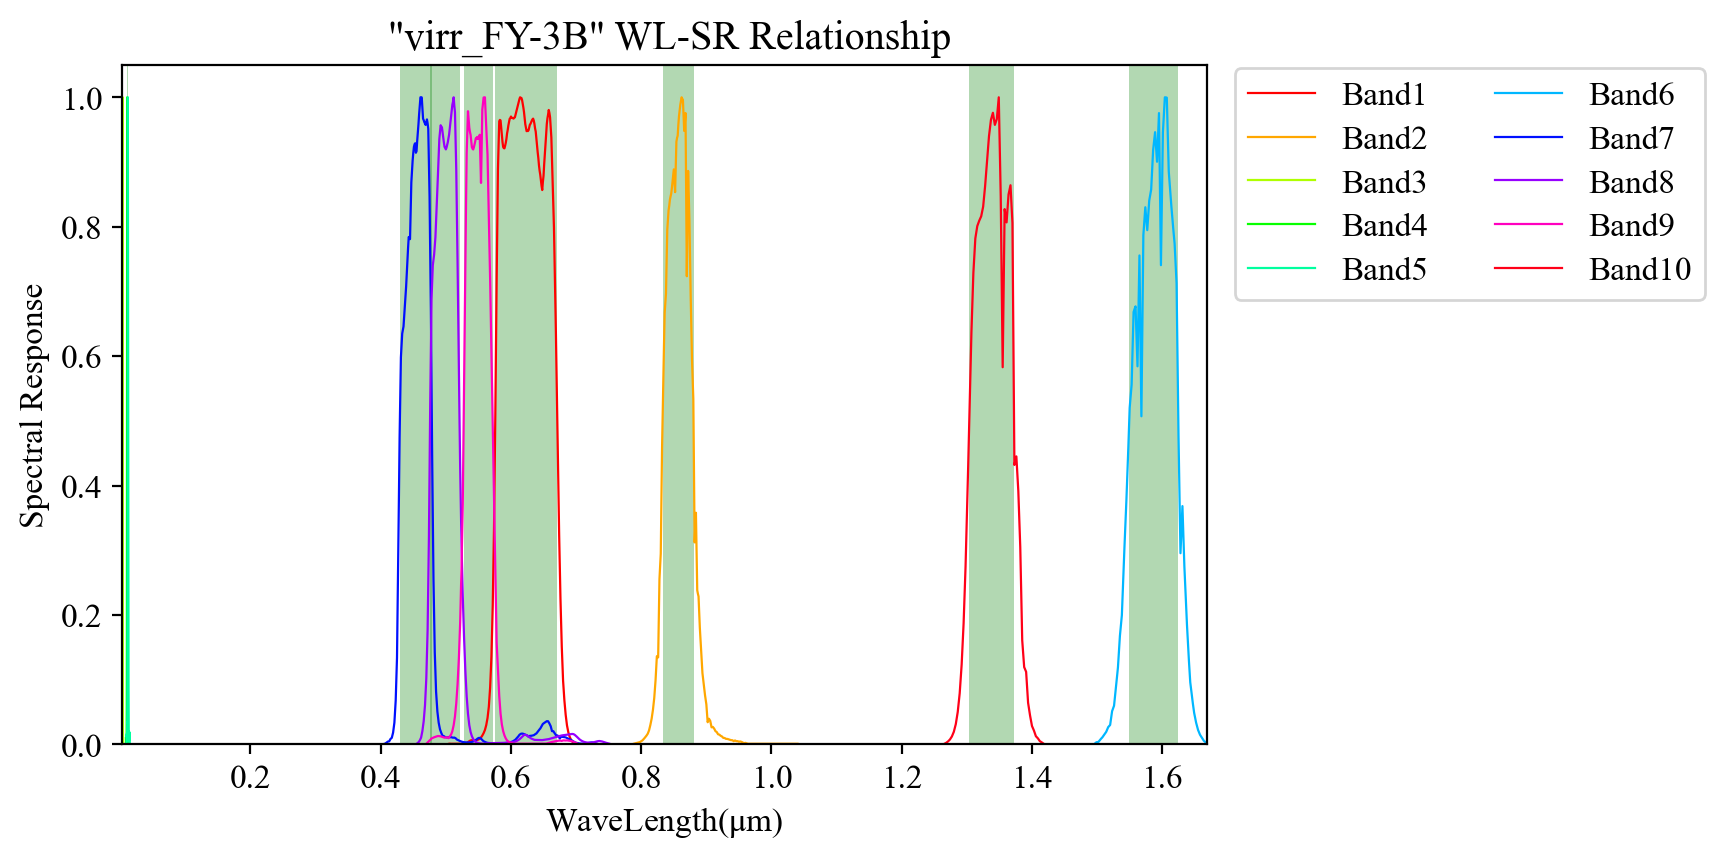

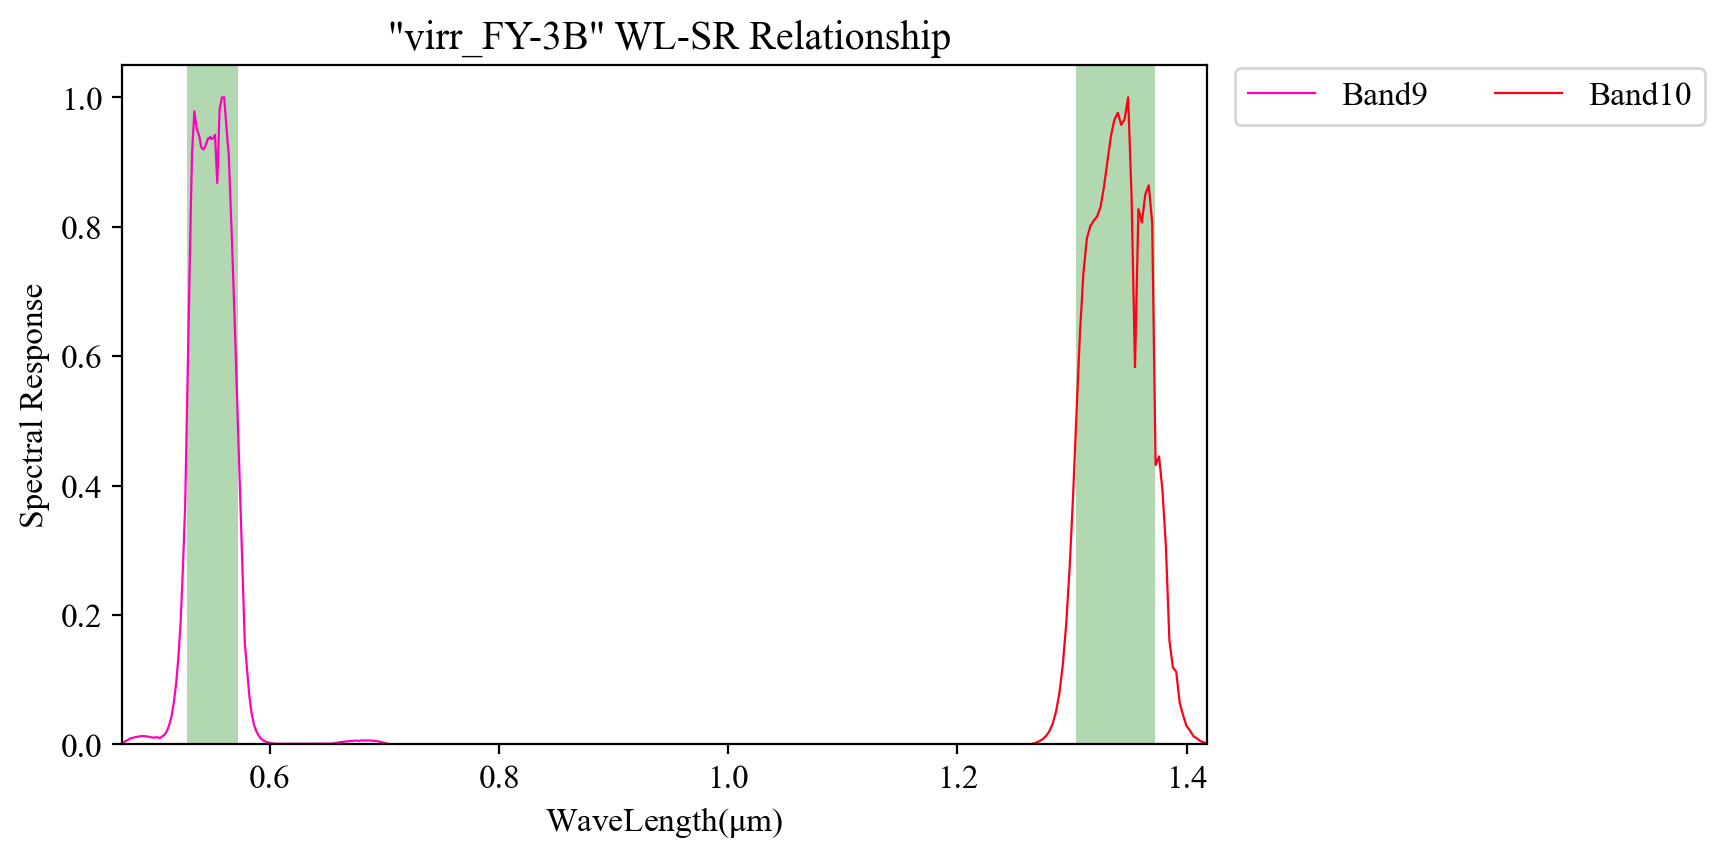

In [4]:
from pkulast.remote.sensor import RelativeSpectralResponse as RSR

virr_rsr = RSR("virr_FY-3B")
virr_rsr.band_count  # band count

# Plot all available bands
virr_rsr.plot()
# Plot specific bands

virr_rsr.plot([9, 10])

### 1.3 Print the relative response functions

In [7]:
for band in virr_rsr:  # output relative response for all bands
    print(band.unit)  # unit of wavelength
    print(band.wv)  # wavelength
    print(band.response)  # response

um
[0.505 0.506 0.507 0.508 0.524 0.525 0.526 0.529 0.53  0.531 0.532 0.533
 0.534 0.535 0.536 0.537 0.538 0.539 0.54  0.541 0.542 0.543 0.544 0.545
 0.546 0.547 0.548 0.549 0.55  0.551 0.552 0.553 0.554 0.555 0.556 0.557
 0.558 0.559 0.56  0.561 0.562 0.563 0.564 0.565 0.566 0.567 0.568 0.569
 0.57  0.571 0.572 0.573 0.574 0.575 0.576 0.577 0.578 0.579 0.58  0.581
 0.582 0.583 0.584 0.585 0.586 0.587 0.588 0.589 0.59  0.591 0.592 0.593
 0.594 0.595 0.596 0.597 0.598 0.599 0.6   0.601 0.602 0.603 0.604 0.605
 0.606 0.607 0.608 0.609 0.61  0.611 0.612 0.613 0.614 0.615 0.616 0.617
 0.618 0.619 0.62  0.621 0.622 0.623 0.624 0.625 0.626 0.627 0.628 0.629
 0.63  0.631 0.632 0.633 0.634 0.635 0.636 0.637 0.638 0.639 0.64  0.641
 0.642 0.643 0.644 0.645 0.646 0.647 0.648 0.649 0.65  0.651 0.652 0.653
 0.654 0.655 0.656 0.657 0.658 0.659 0.66  0.661 0.662 0.663 0.664 0.665
 0.666 0.667 0.668 0.669 0.67  0.671 0.672 0.673 0.674 0.675 0.676 0.677
 0.678 0.679 0.68  0.681 0.682 0.683 0.684 0.685

## 2. Surface module to represent surface conditions

In [18]:
import os

import pylab as plt
from pkulast.surface.spectrum import SpectralLibrary

# Supported library: USGS, ECOSTRESS, ASTER, and RELAB
aster = SpectralLibrary("ASTER")

### 2.1 Plot single sample

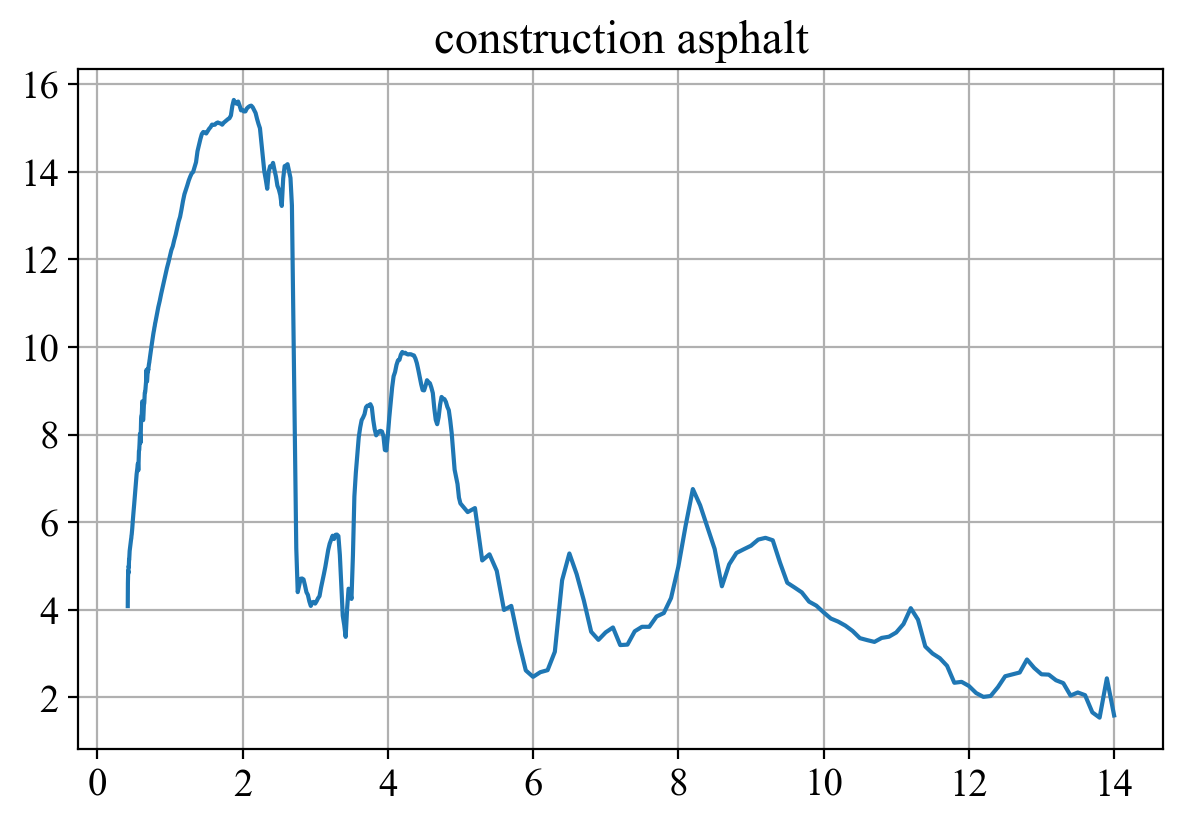

In [20]:
index = 1
s = aster.get_signature(index)
plt.plot(s.x, s.y)
plt.title(s.sample_name)
plt.grid(1)
plt.show()

### 2.2 Plot specific samples

['manmade materials', 'stony meteorites', 'rocks', 'soils', 'soil', 'vegetation', 'water', 'frost, snow and ice', 'mineral', 'mineral (synthetic)', 'rock']
aragonite caco3
calcite caco3
calcite caco3
cerussite, pbco3
dolomite camg(co3)2
dolomite camg(co3)2
dolomite camg(co3)2
aragonite caco3
calcite caco3
calcite caco3


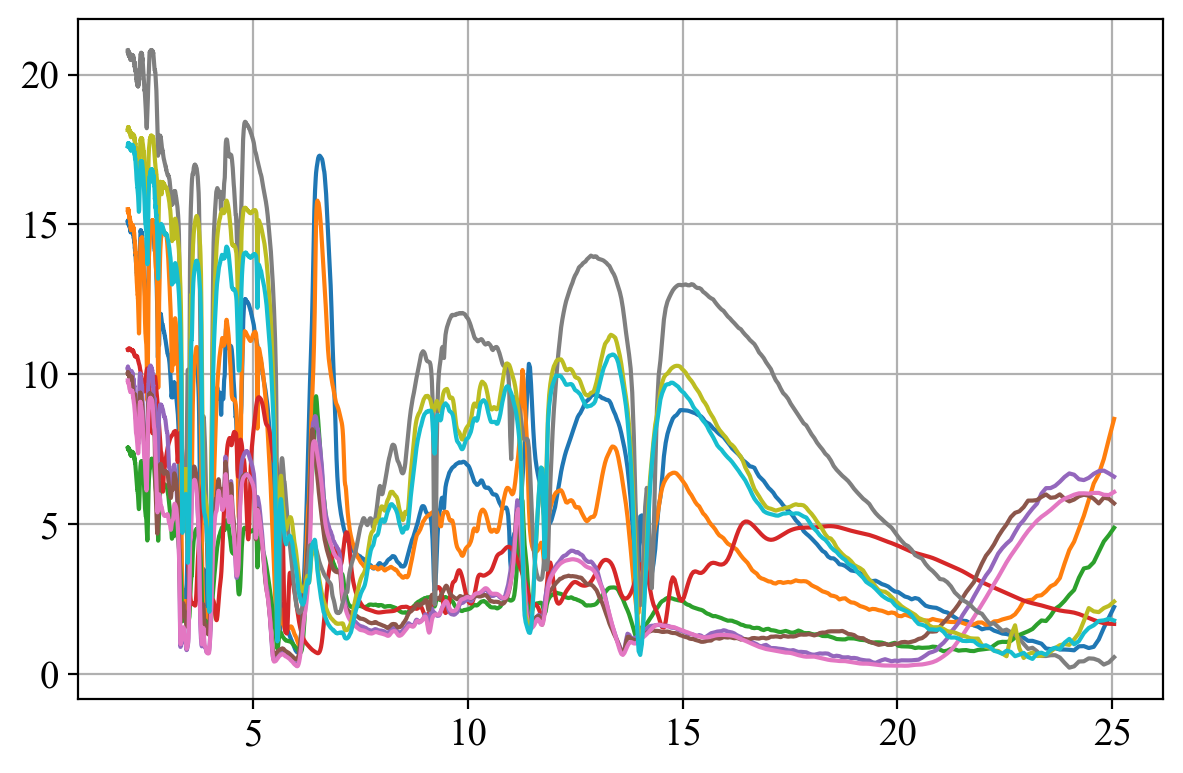

In [35]:
types = aster.get_type()
print(types)
samples = aster.filter_type("mineral")
for spec in samples[:10]:
    print(spec[1])
    index = spec[0]
    s = aster.get_signature(index)
    plt.plot(s.x, s.y)
plt.grid(1)
plt.show()

### 2.3 Emissivity empirical relationship exploration

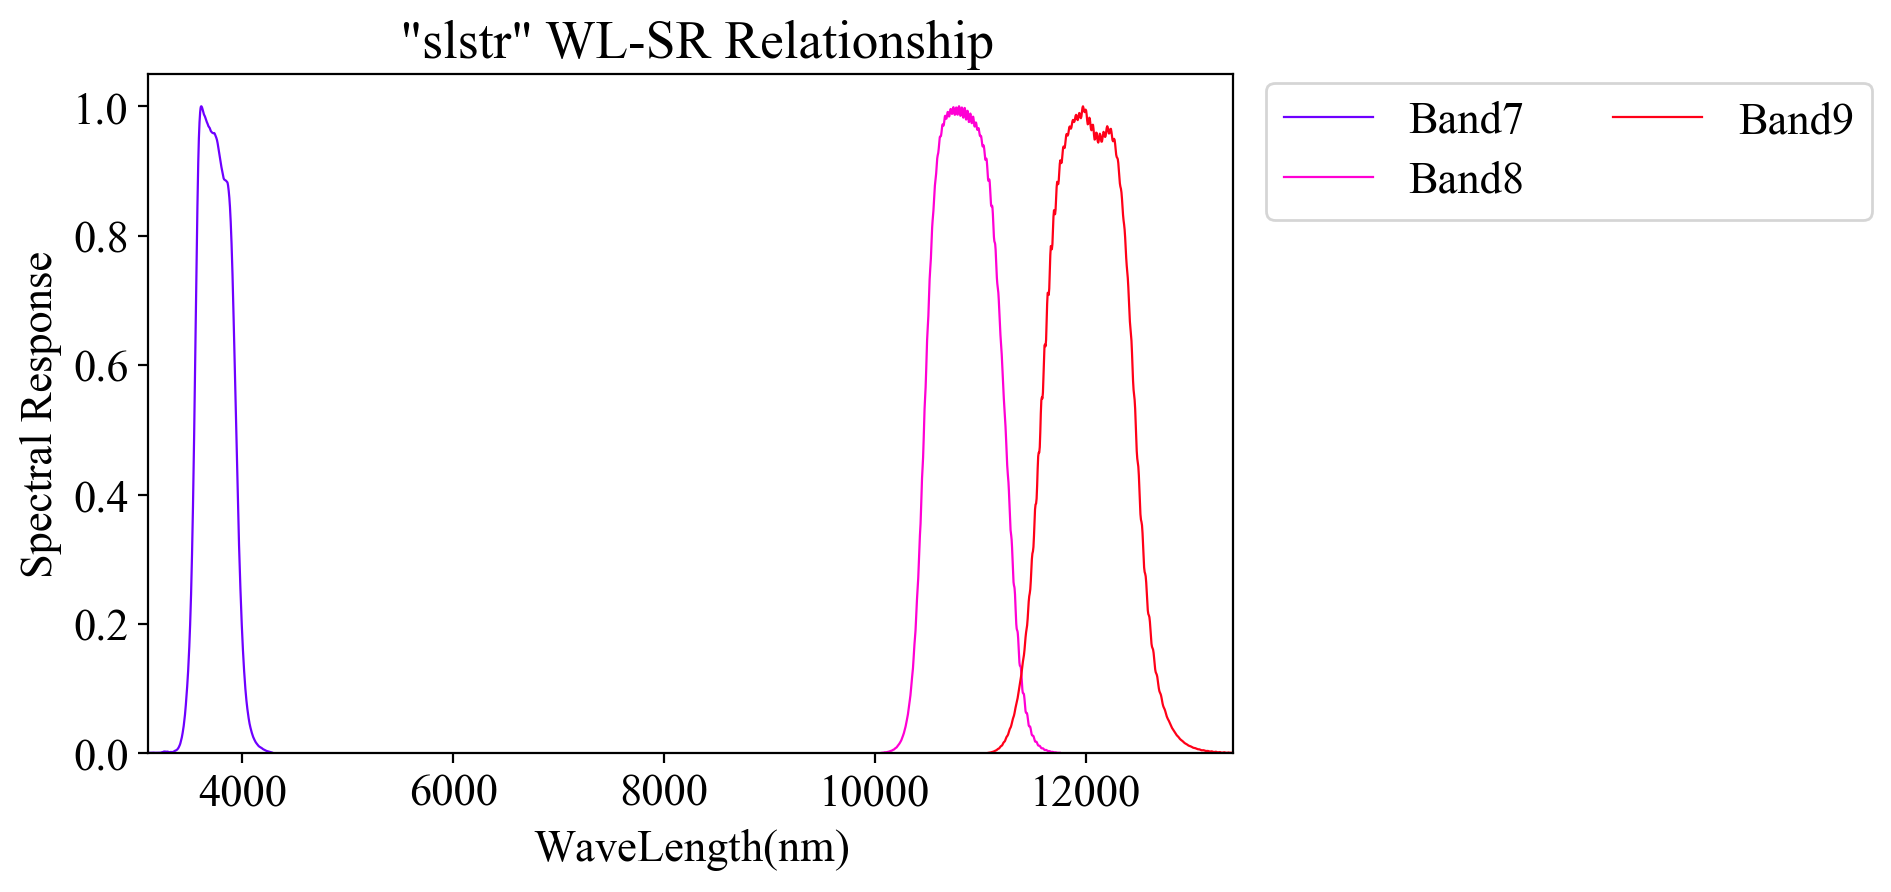

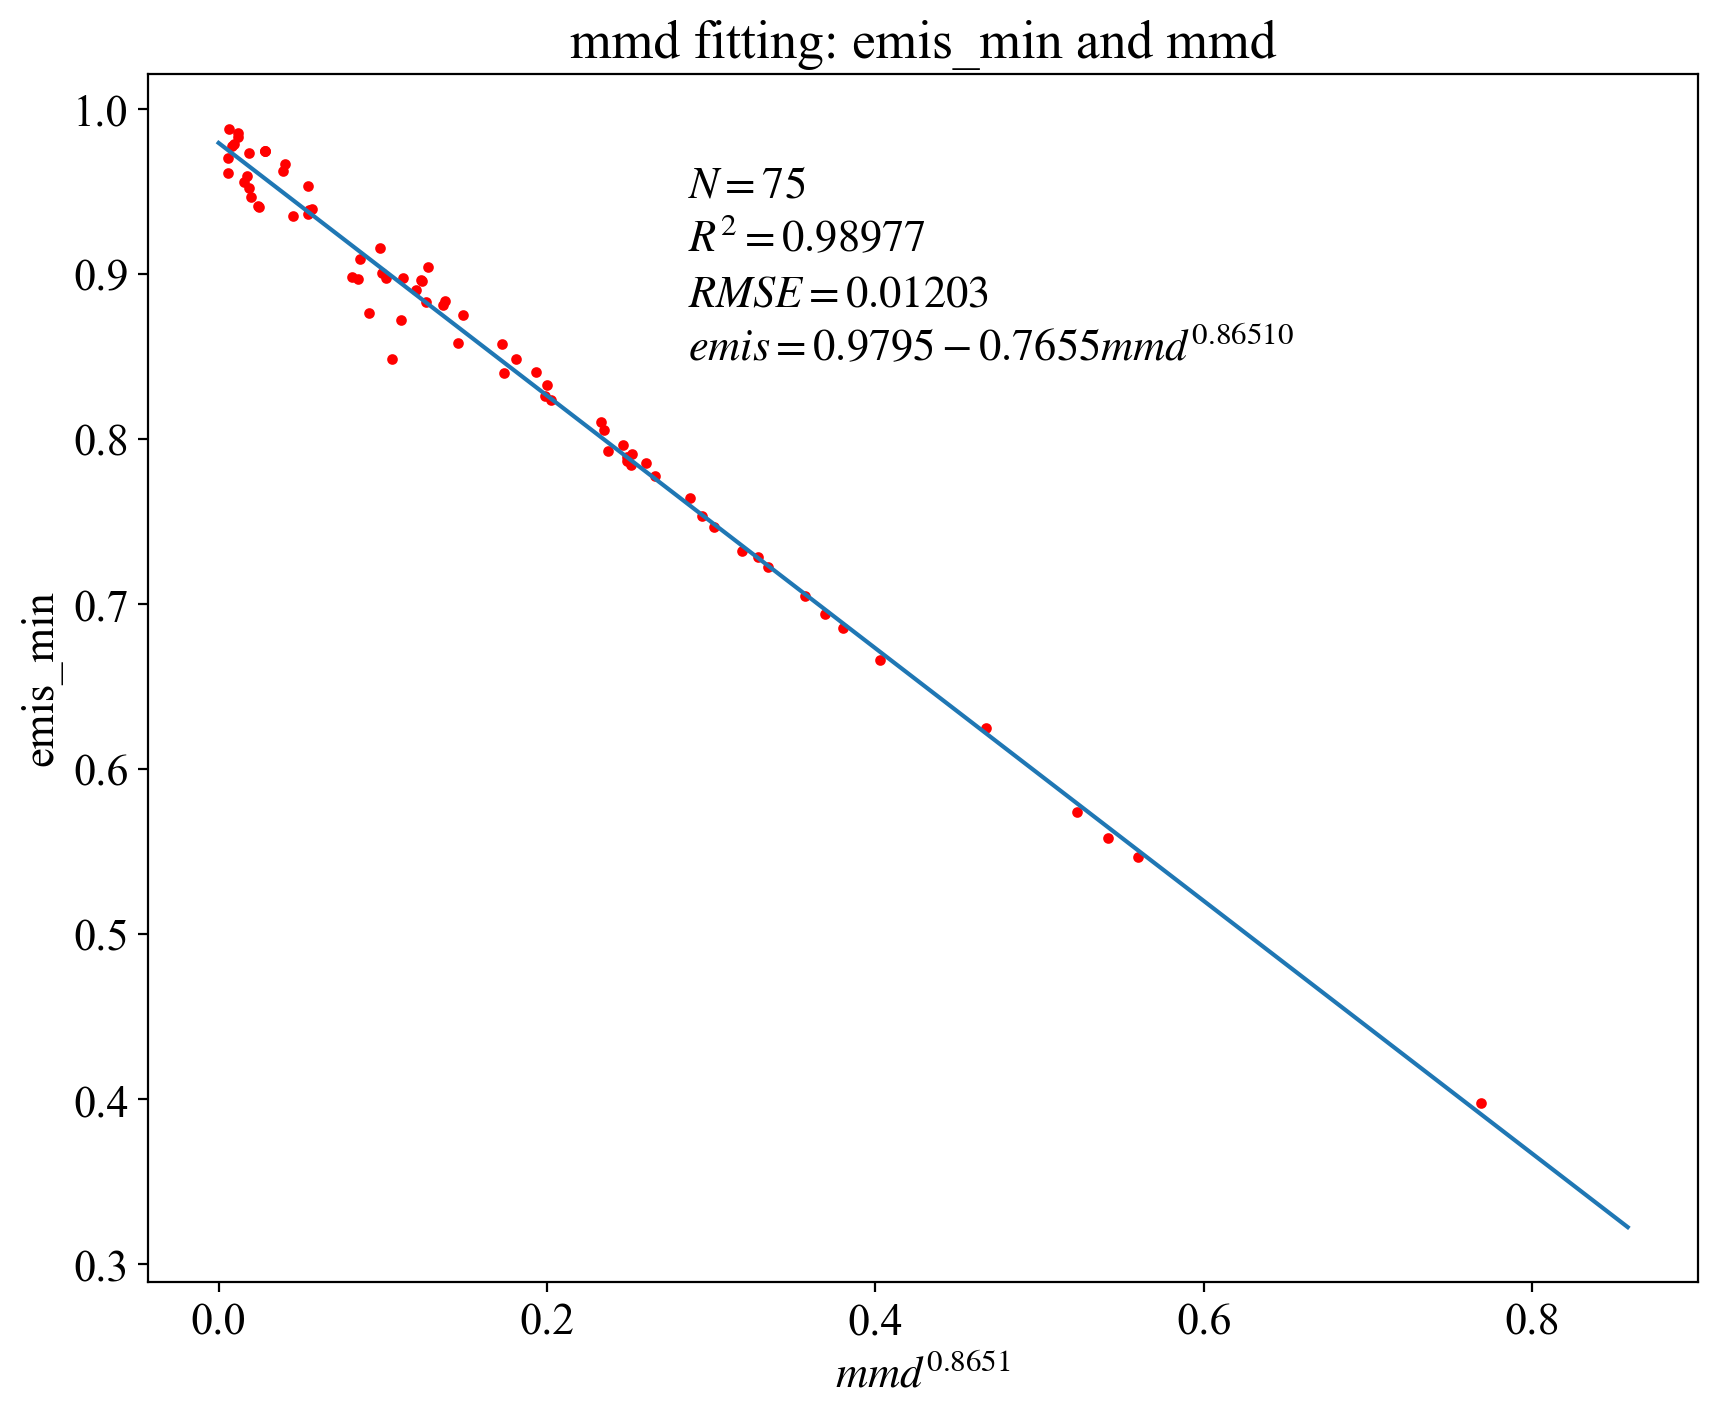

In [42]:
import pylab as plt
from pkulast.surface.emissivity import UniRel

# construct MMD empirical relationship for Sentinel/SLSTR using default surface sample dataset
f = RSR("slstr")
f.subset((7, 8, 9))

f.plot(show_span=False)
plt.show()

# MMD fitting
uni = UniRel(f)
uni.fit()
uni.plot()

## 3. Atmosphere module to represent air conditions

### 3.1. Different Atmospheric Profile Libraries

Seebor Library


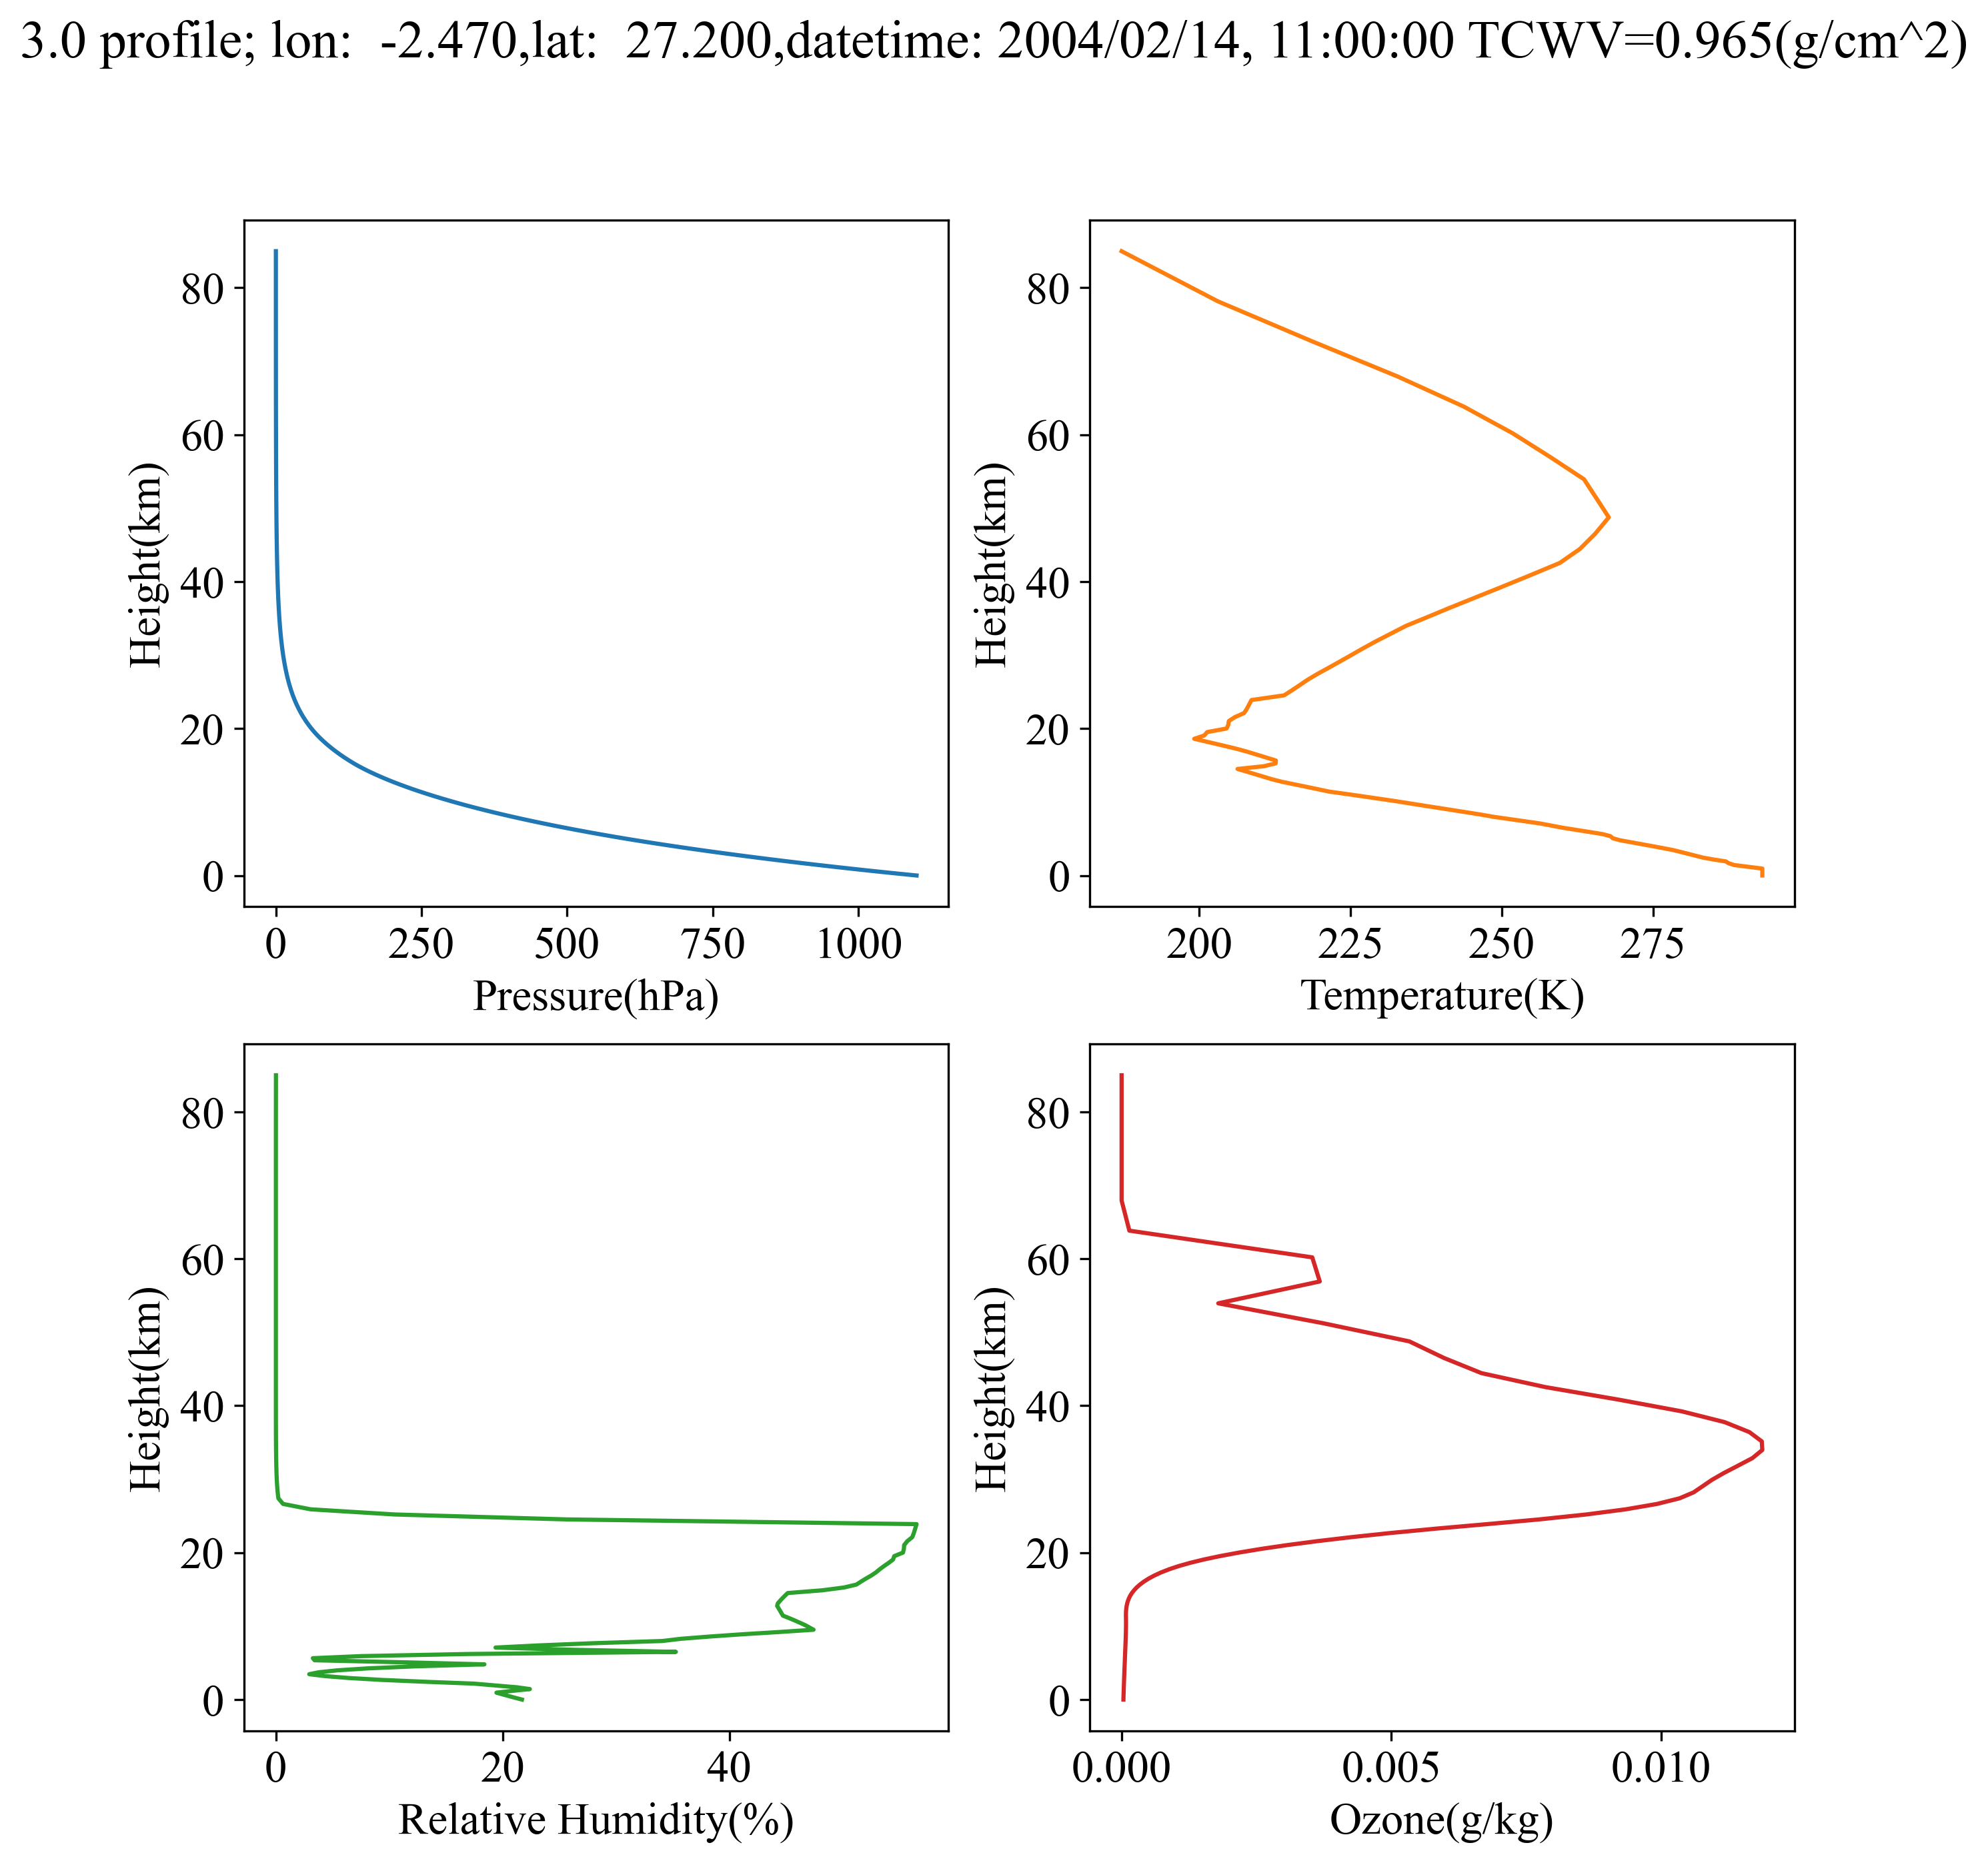

TIGR Library


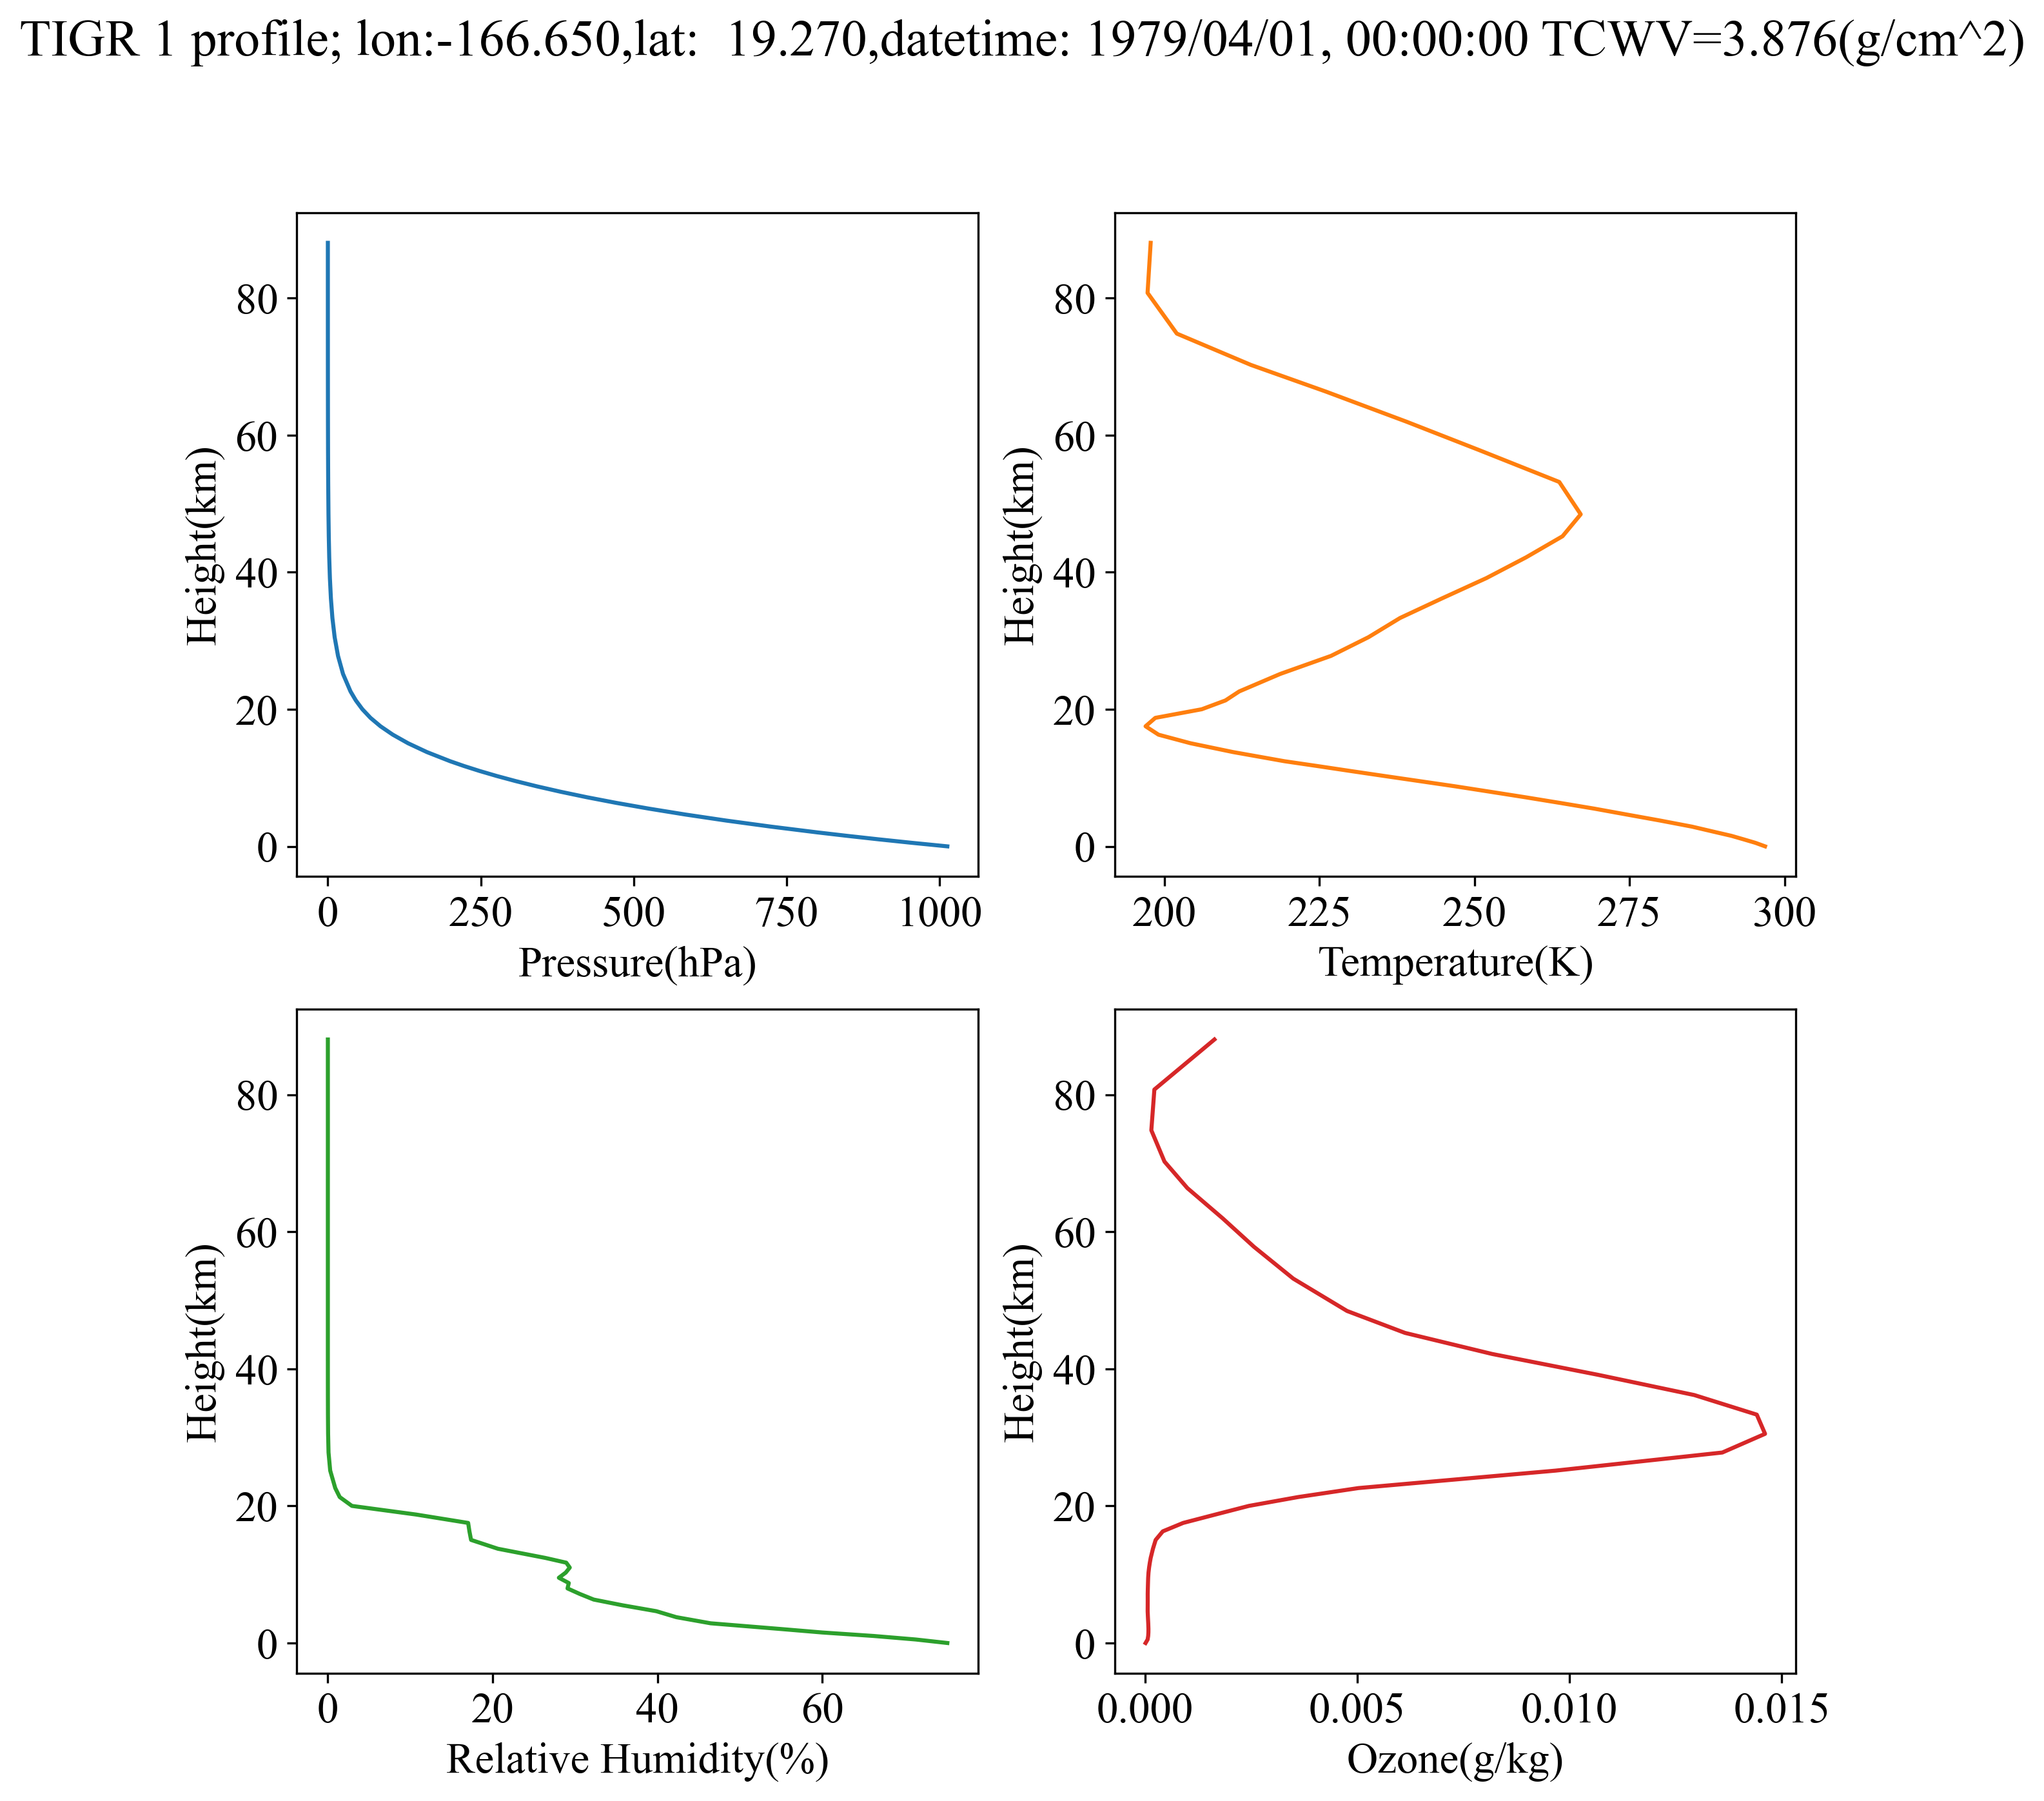

['subarctic summer', 'subarctic winter', 'midlatitude summer', 'midlatitude winter', 'tropical', 'us-standard 1976']


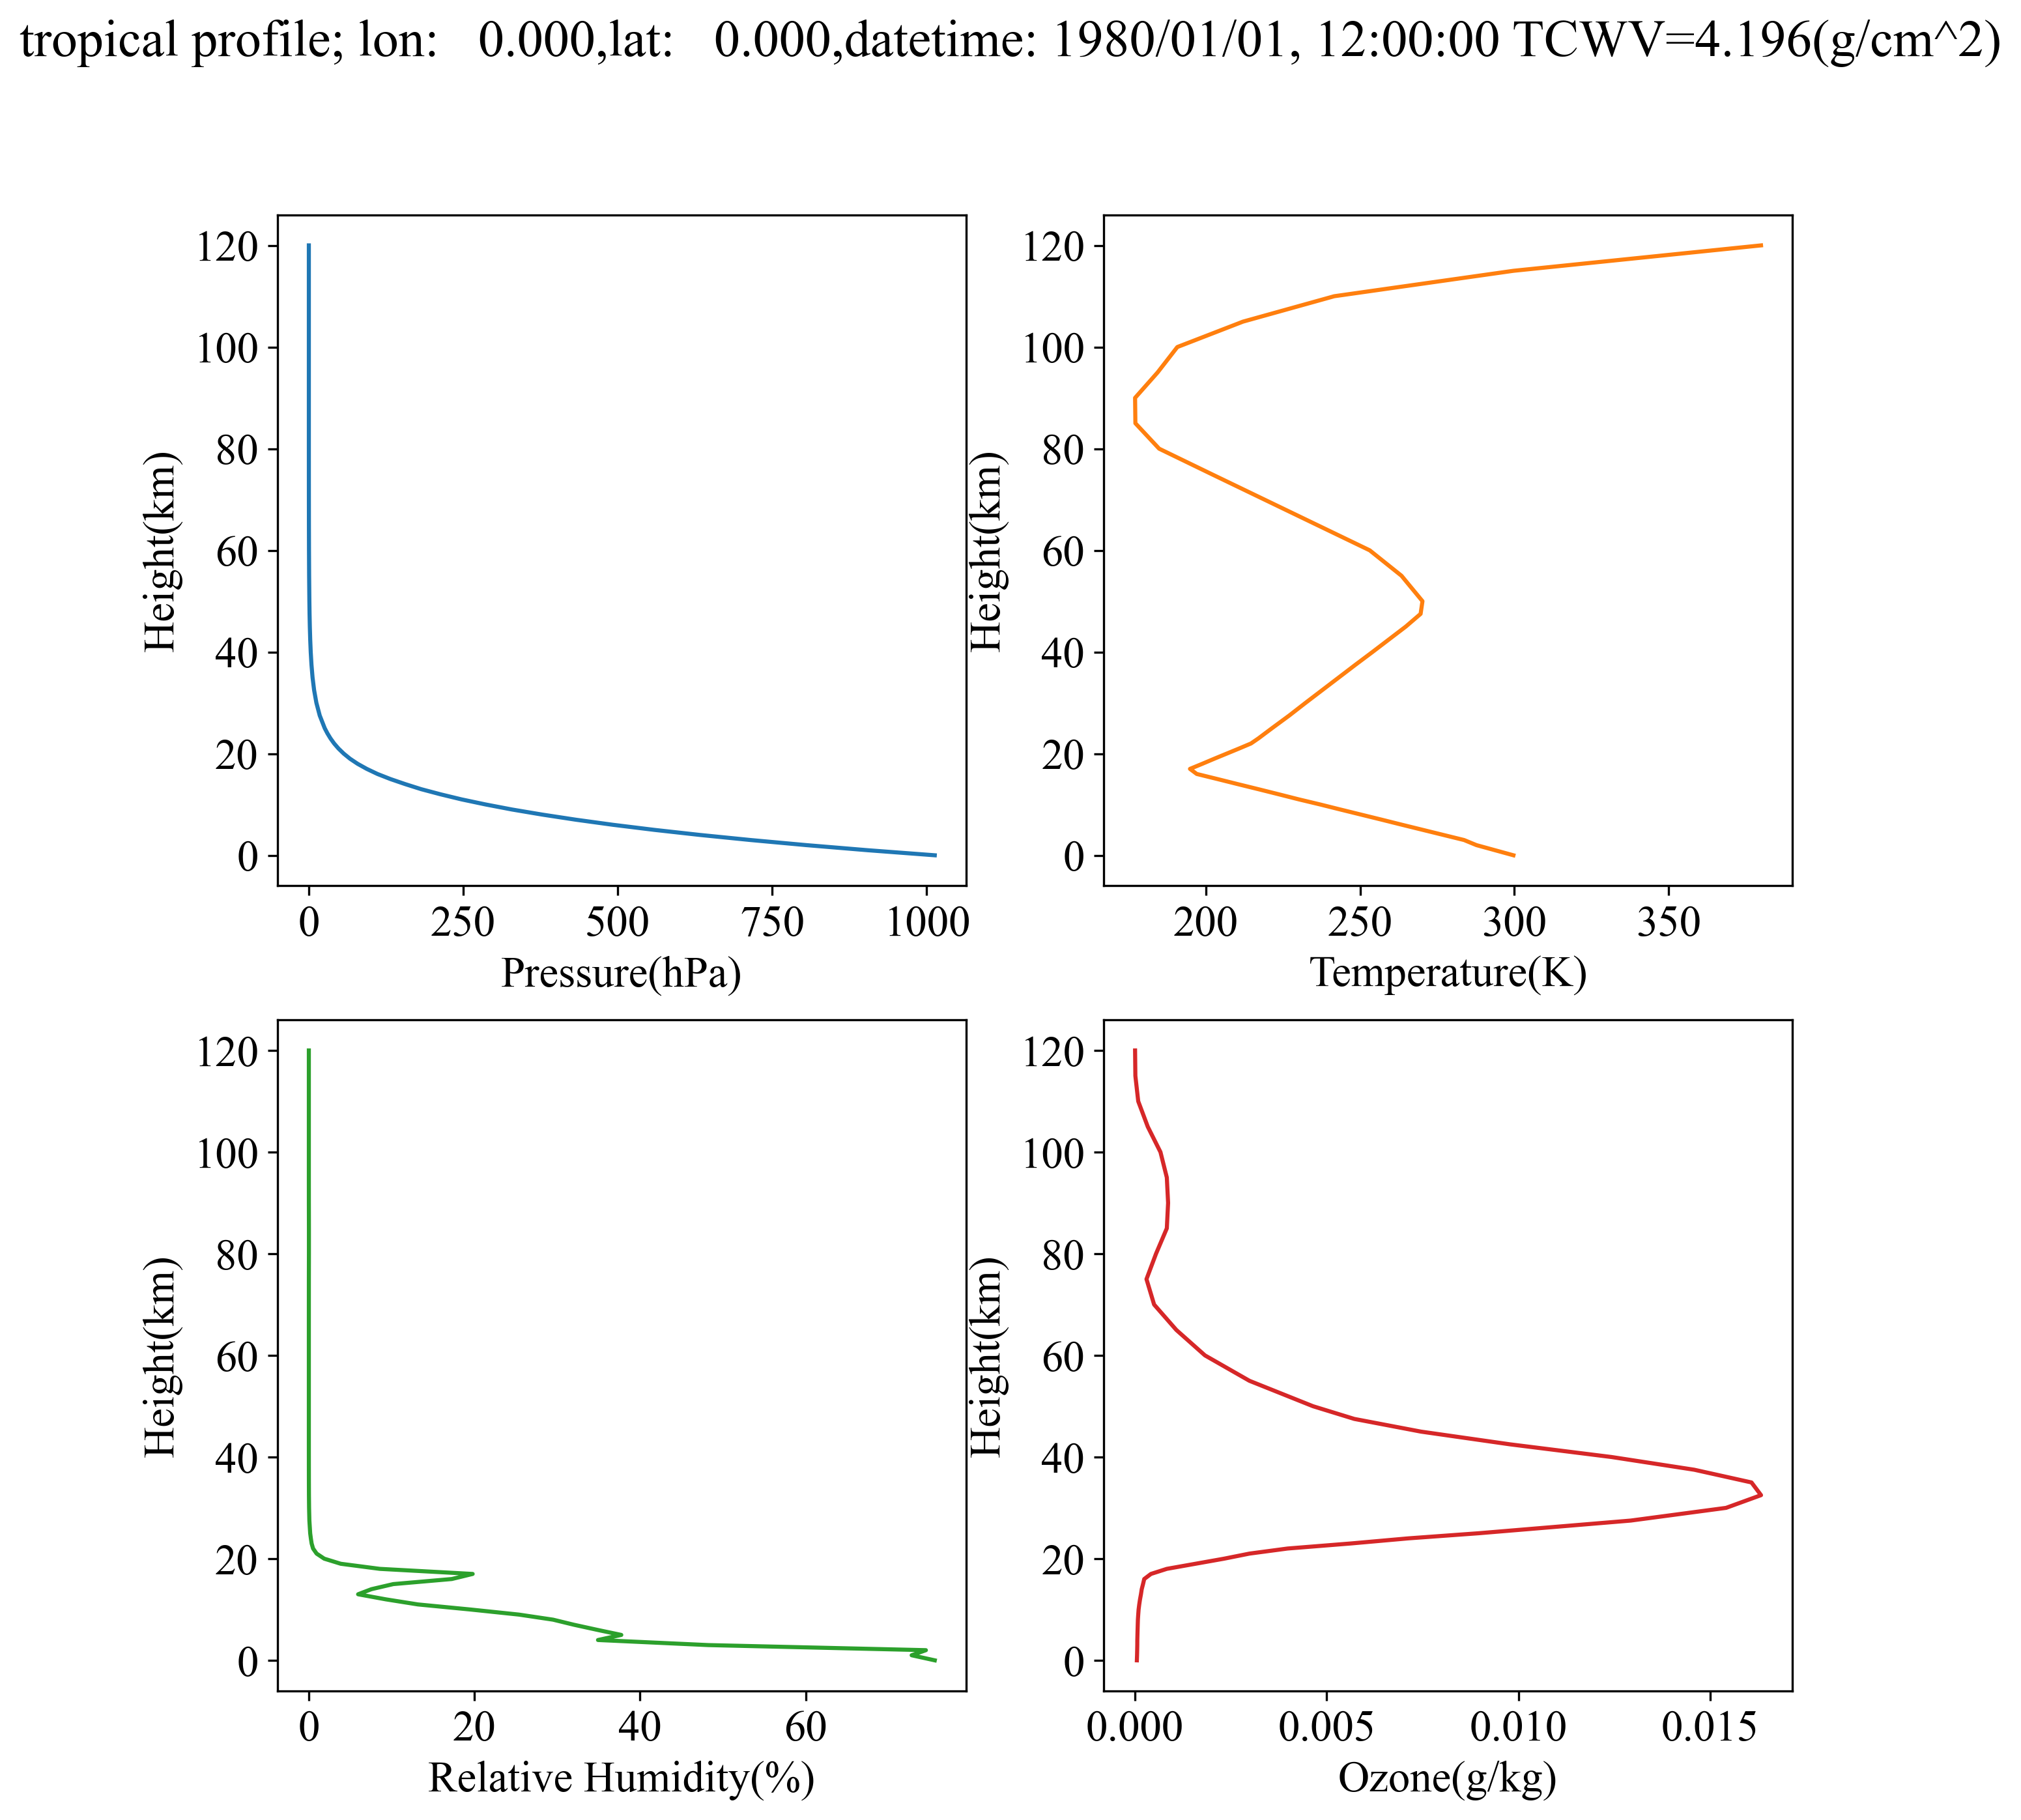

In [37]:
from simpir.atmosphere.profile import SeeborLibrary, StandardLibrary, TIGRLibrary

# Seebor
print("Seebor Library")
t = SeeborLibrary()  # ERA5 MERRA2
profile = t[0]
profile.plot()

# TIGR
print("TIGR Library")
t = TIGRLibrary()  # ERA5 MERRA2
profile = t[0]
profile.plot()

# Standard
s = StandardLibrary()
print(s.keys())
p = s.profiles["tropical"]
p.plot()

### 3.2 Extract Atmospheric Profile from Reanalysis Data

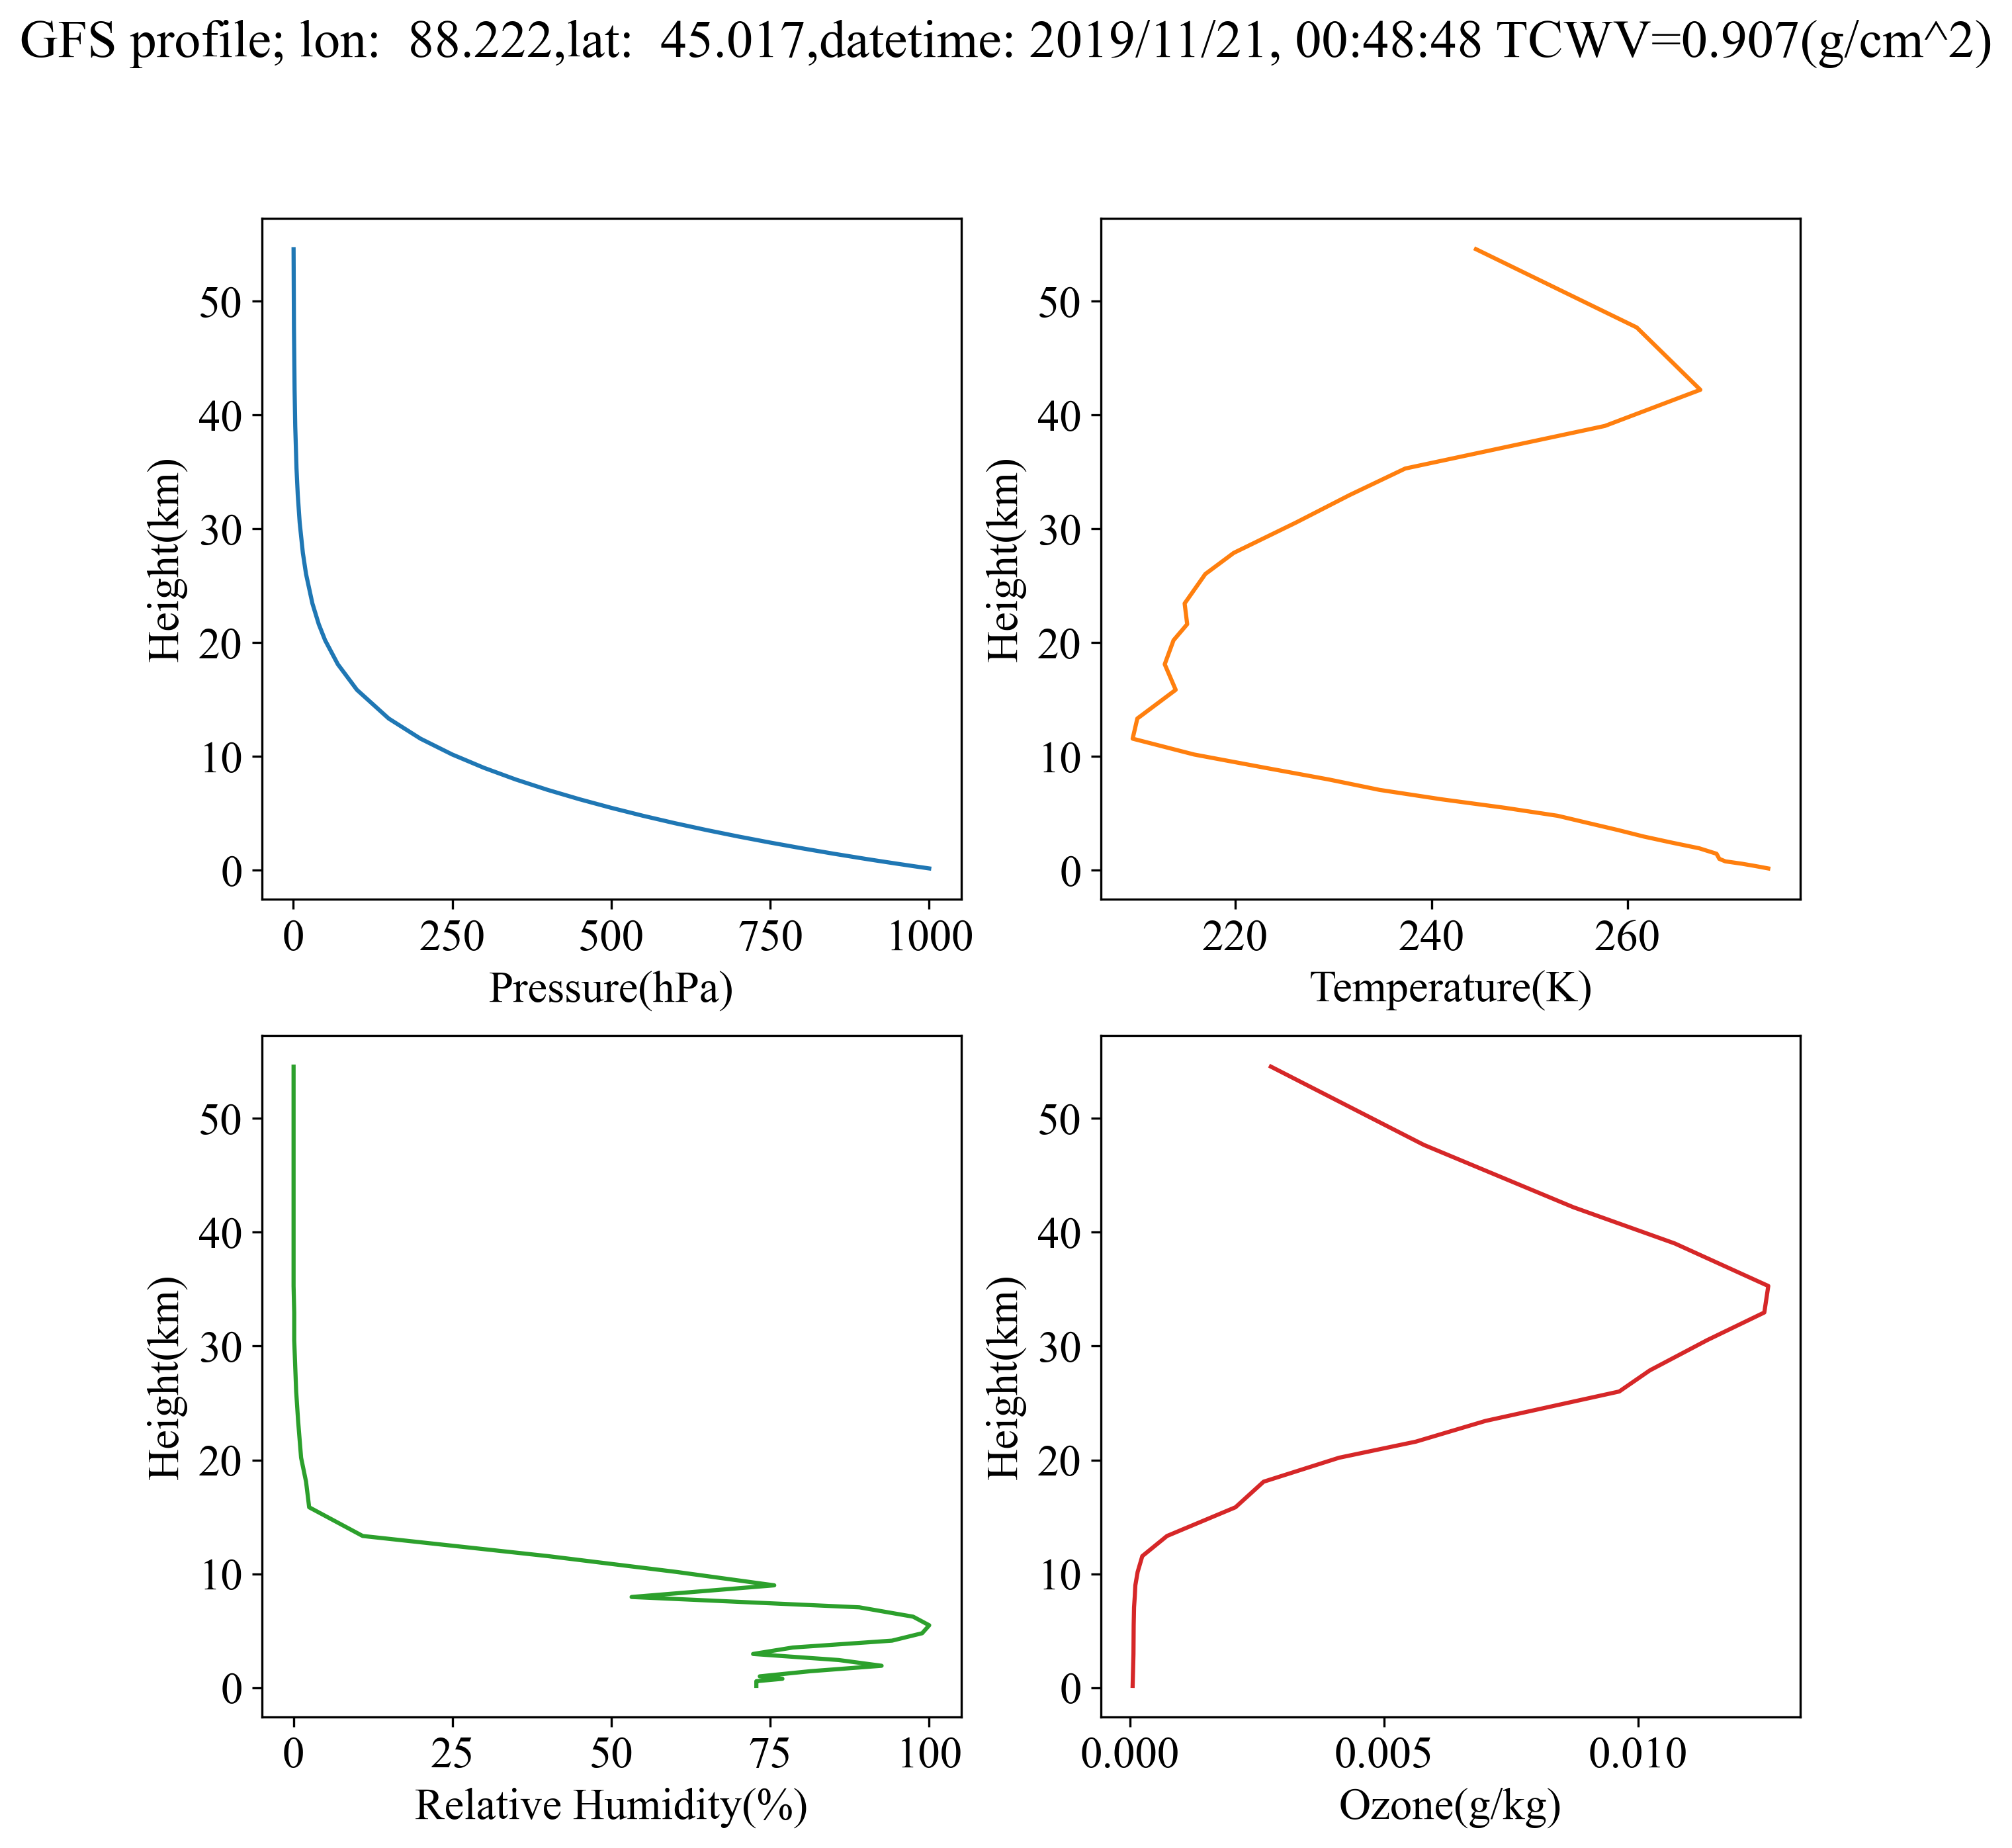

In [39]:
from datetime import datetime

from pkulast.atmosphere.profile import NWPLibrary

# NWP, NCEP/GFS is used
lat = 45.0166
lon = 88.2218
acq_time = datetime(2019, 11, 21, 0, 48, 48)
p = NWPLibrary()
profile = p.extract(acq_time, lat, lon)
profile.plot()

## 4. LST and LSE Retrieval from GaoFen5 VIMS data

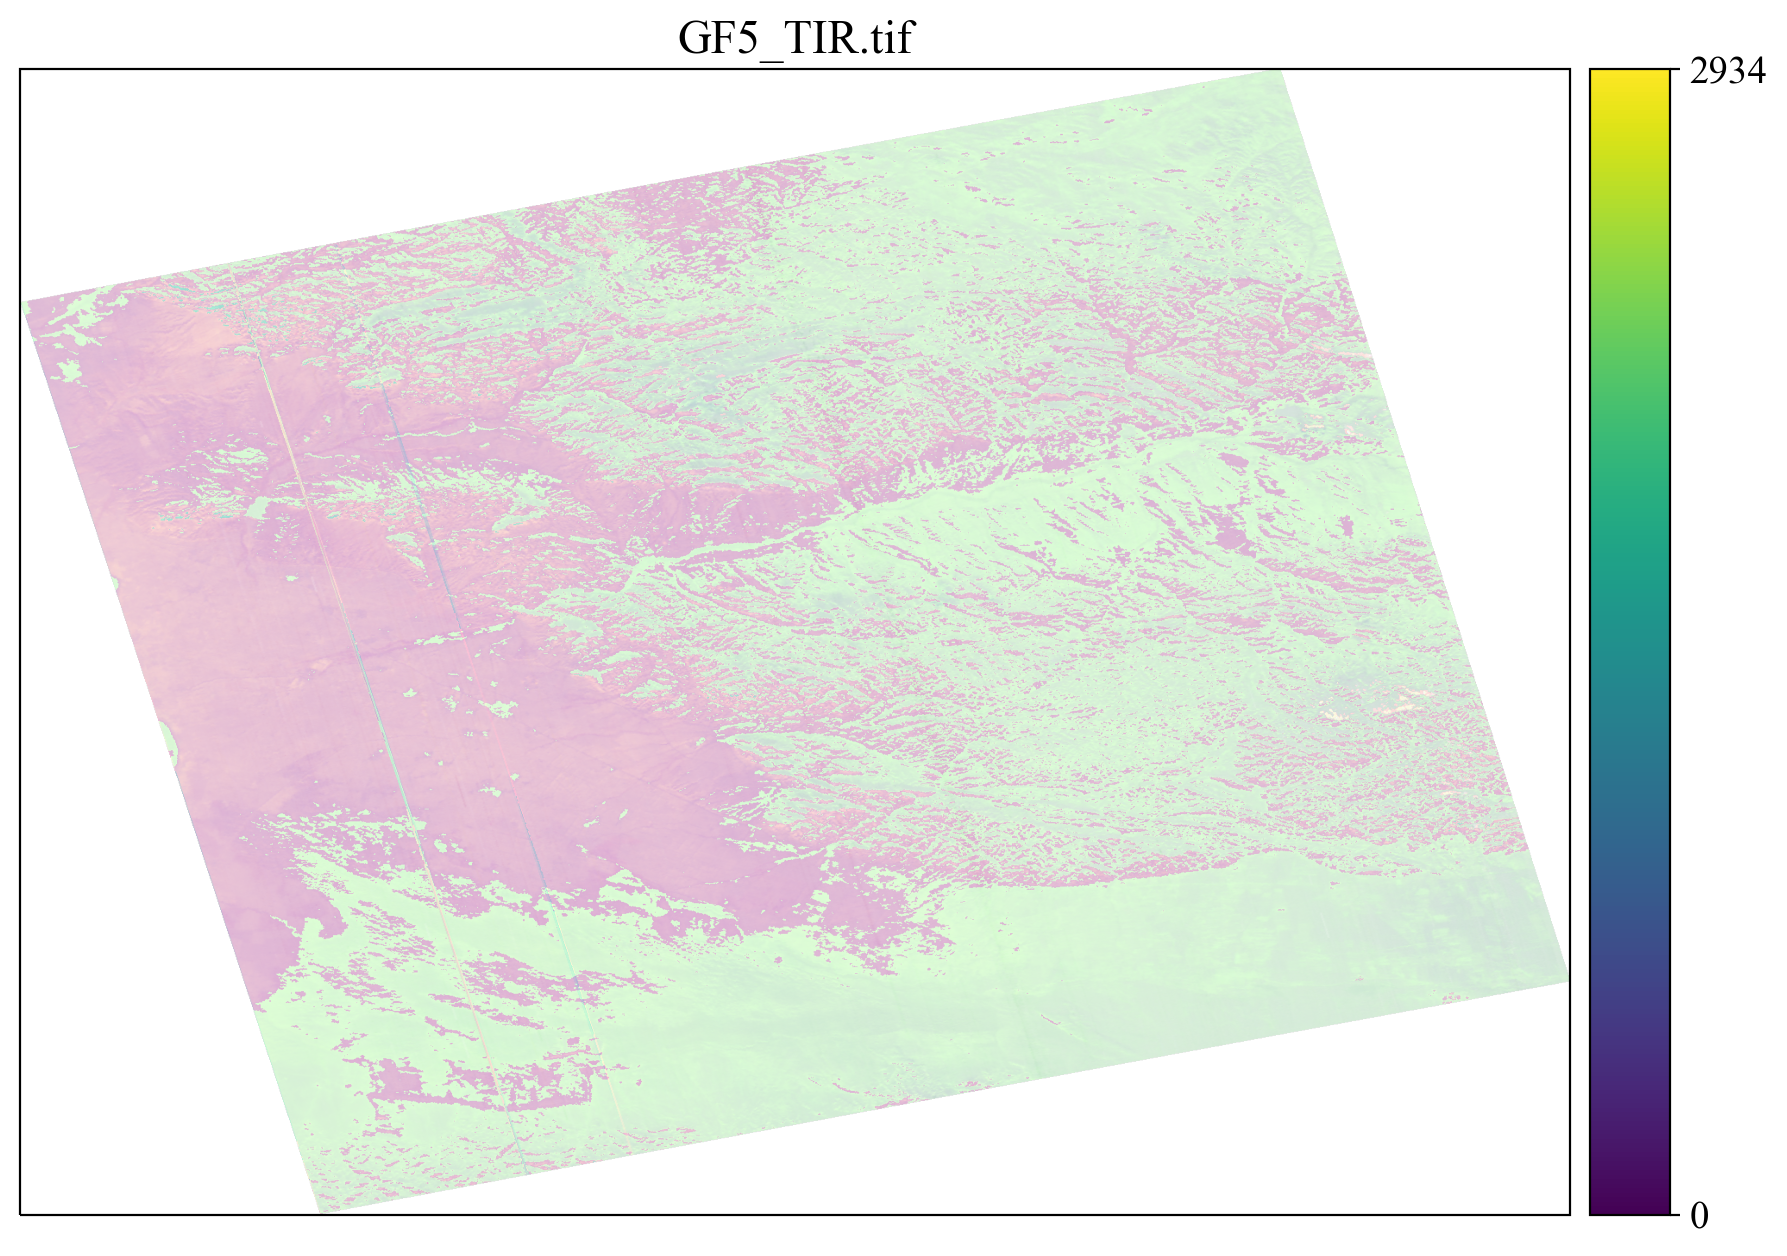

In [72]:
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show


def plot_raster(filename, title=None):
    if not title:
        title = os.path.basename(filename)
    proj = ccrs.PlateCarree()
    fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 10))
    src = rasterio.open(filename)
    data = src.read().astype("uint8")
    data_f = src.read().astype(src.profile["dtype"])
    vmin, vmax = np.nanpercentile(data_f, (10, 95))  # 5-95% contrast stretch
    im = show(
        data,
        transform=src.transform,
        ax=ax,
        vmin=vmin,
        vmax=vmax,
        origin="upper",
        cmap="viridis",
        adjust="linear",
    )

    plt.title(title)
    ticks = [int(vmin), int(vmax)]
    cax = fig.add_axes(
        [
            ax.get_position().x1 + 0.01,
            ax.get_position().y0,
            0.04,
            ax.get_position().height,
        ]
    )
    cb = plt.colorbar(im.images[0], cax=cax, ticks=ticks)
    plt.plot()


plot_raster("GF5_TIR.tif")

### 4.1 Radiometric Calibration

In [53]:
import numpy as np
from pkulast.api import calibration

gains = np.array([0.005828, 0.005303, 0.002510, 0.000198])
offsets = np.array([-0.398921, -1.341876, 0.013242, 6.471547])
calibration(
    r"GF5_TIR.tif",
    r"GF5_TIR_calibrated.tif",
    gains=gains,
    offsets=offsets,
    src_nodata=0,
)


Timer log
--------------------------------------------------------------------------------------------------------------
          Executor                     [run]                         run :        11.122 s (Call Time:      1)
--------------------------------------------------------------------------------------------------------------


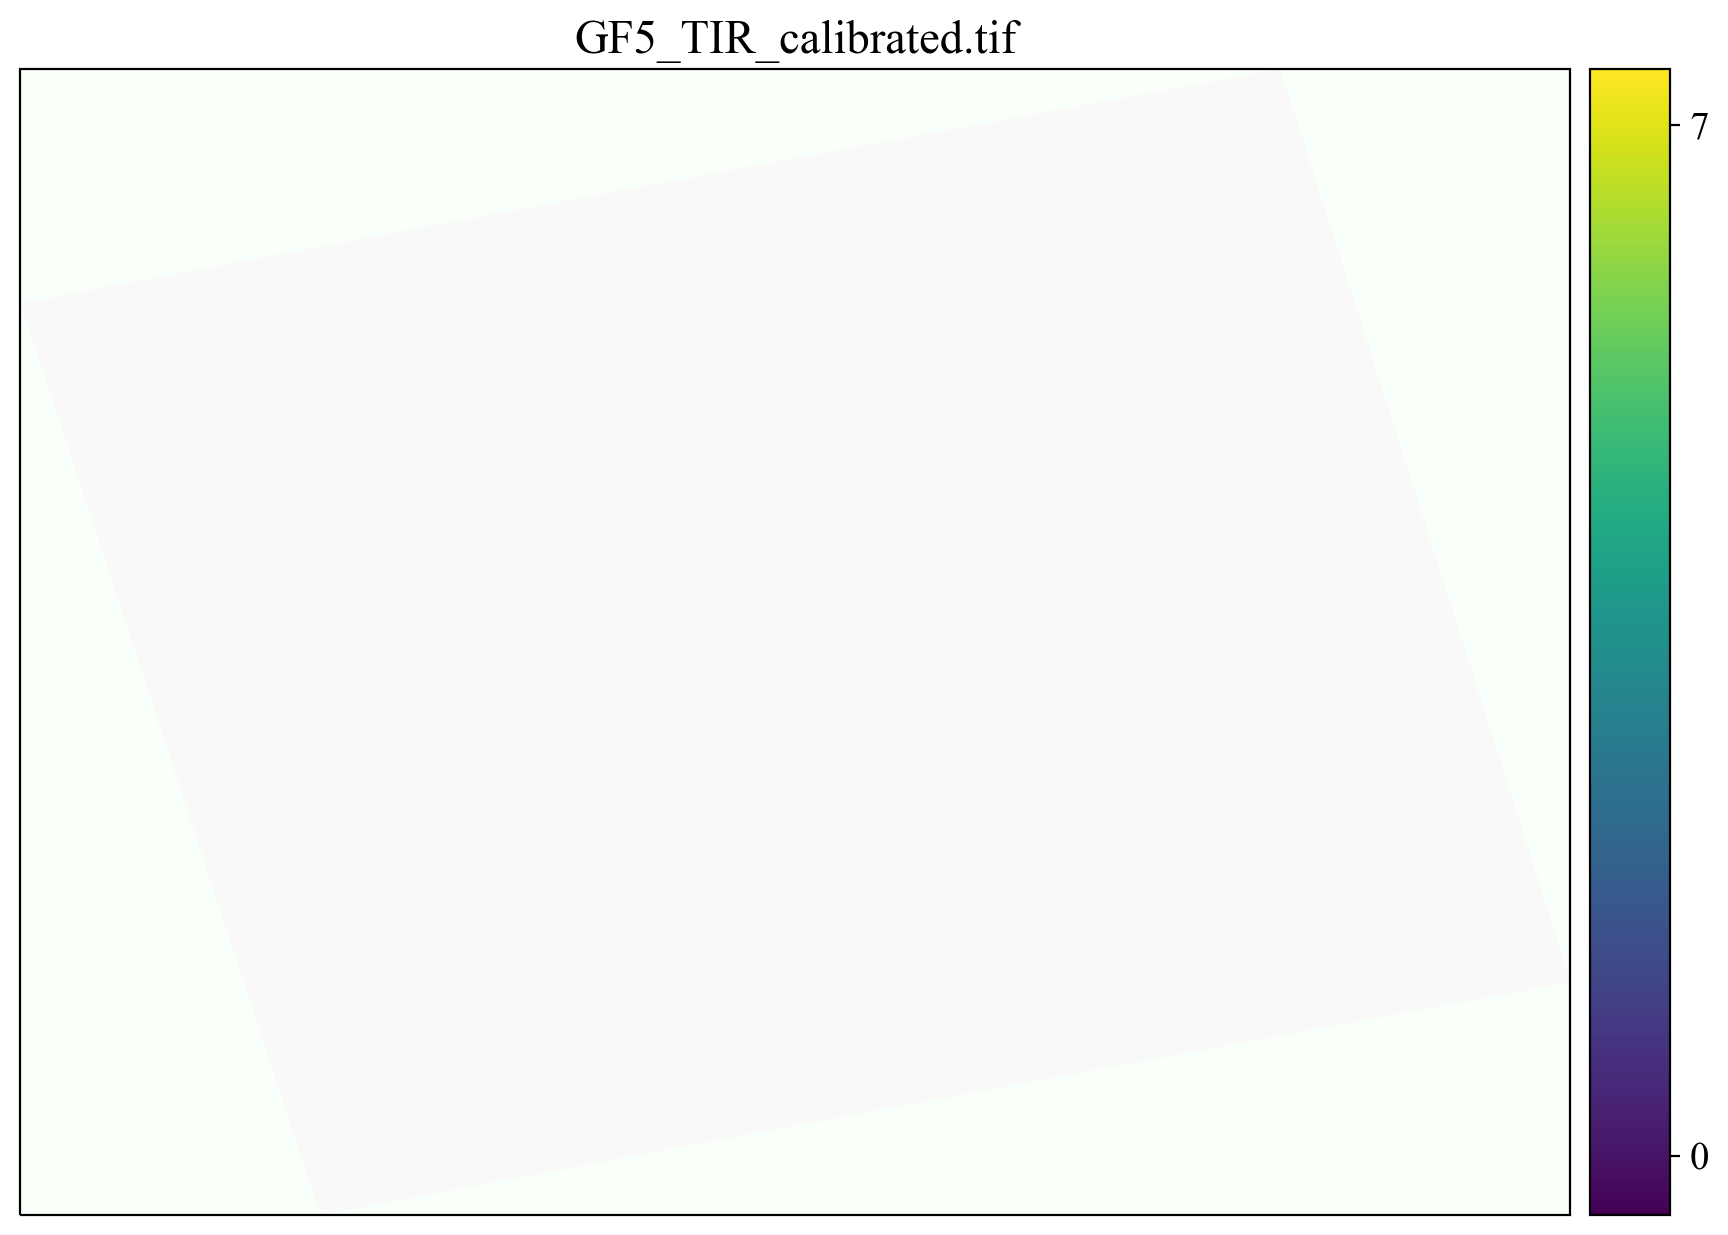

In [73]:
plot_raster("GF5_TIR_calibrated.tif")

### 4.2 Atmospheric Correction

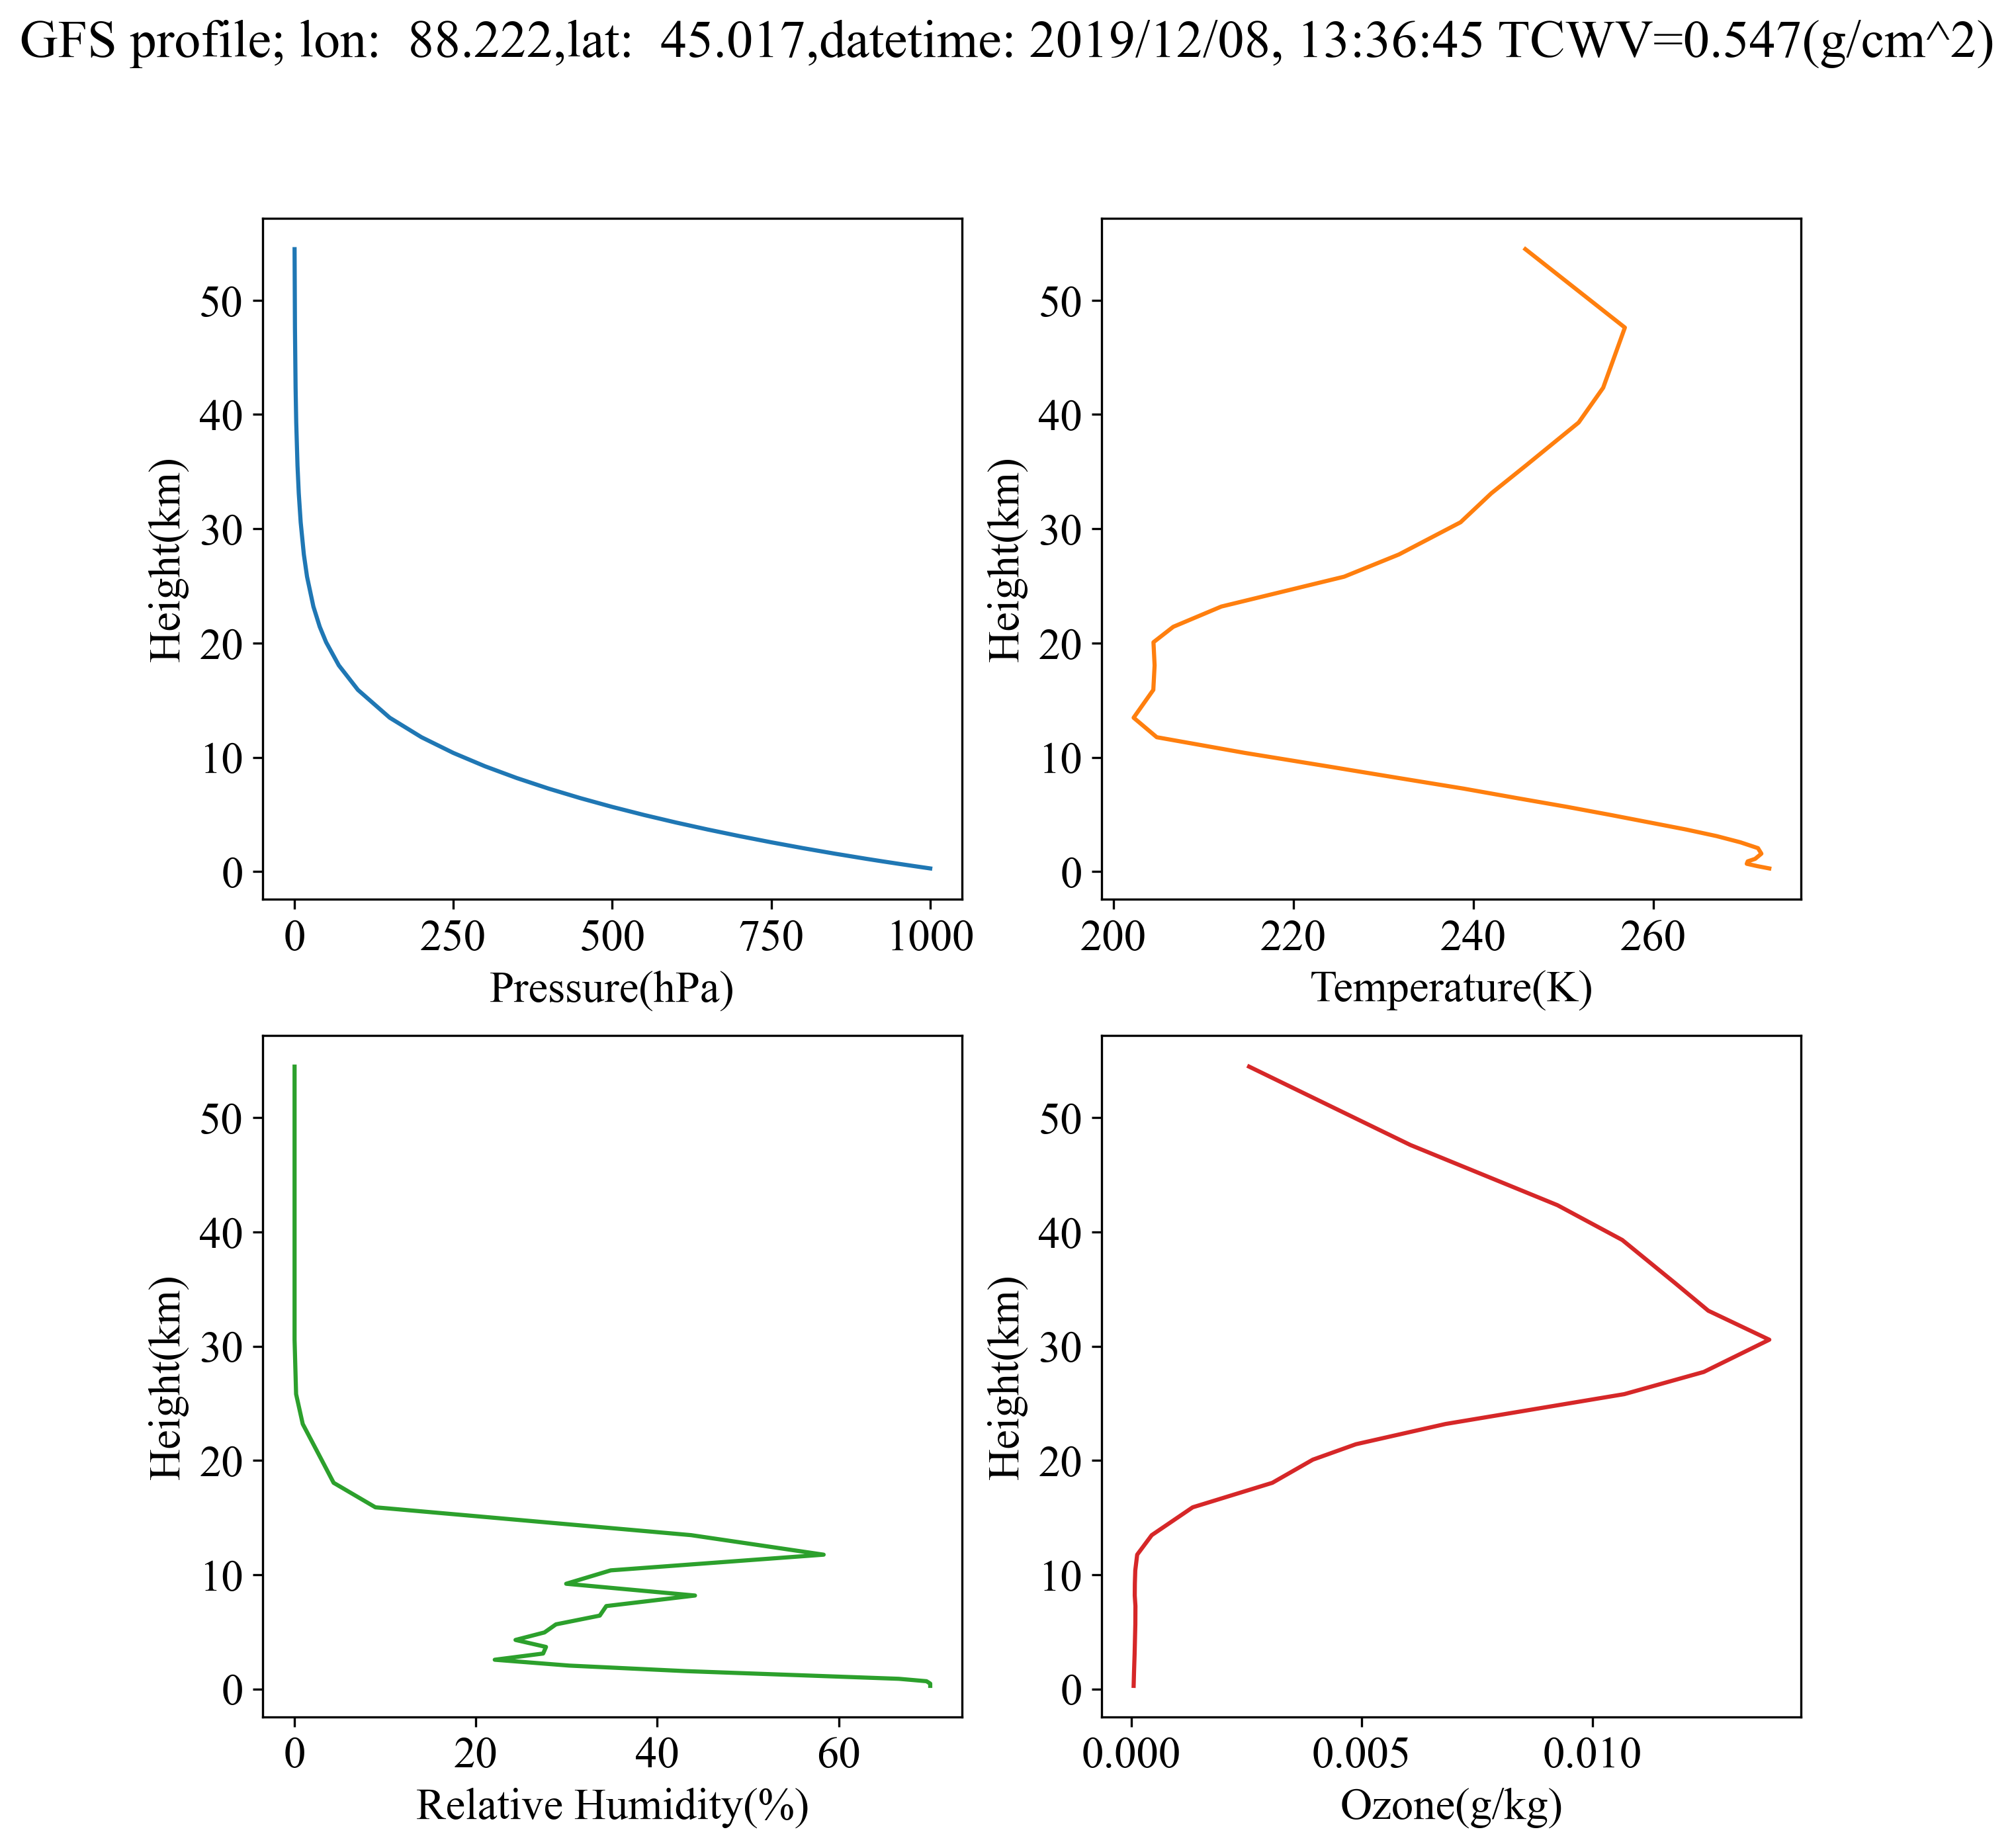


Timer log
--------------------------------------------------------------------------------------------------------------
          Executor                     [run]                         run :       22.6977 s (Call Time:      2)
--------------------------------------------------------------------------------------------------------------


In [74]:
from datetime import datetime

from pkulast.api import atm_corr
from pkulast.atmosphere.profile import NWPLibrary
from pkulast.remote.sensor import RelativeSpectralResponse
from pkulast.rtm.model import run_modtran

acq_time = datetime.strptime("2019-12-08 13:36:45", "%Y-%m-%d %H:%M:%S")

f = RSR("GF5")
lat = 45.0166
lon = 88.2218
p = NWPLibrary()
profile = p.extract(acq_time, lat, lon)
is_satellite = True
profile.plot()
atm = run_modtran(
    [
        profile,
    ],
    f,
    is_satellite,
    mult=True,
    vza=0,
)
atm
atm_corr(
    "GF5_TIR_calibrated.tif",
    "GF5_TIR_atm_correted.tif",
    uward=atm["uward"][0],
    trans=atm["trans"][0],
    nodata=0,
)

### 4.3 Retrieval

In [79]:
from datetime import datetime

from pkulast.api import pixel_retrieval

flight_height = 100
ground_height = profile.H[0]
acq_time = datetime.strptime("2019-12-08 13:36:45", "%Y-%m-%d %H:%M:%S")
pixel_retrieval(
    "GF5_TIR_atm_correted.tif",
    "GF5_LSTE.tif",
    f,
    lat,
    lon,
    acq_time,
    is_satellite,
    flight_height,
    ground_height,
    save_path="./",
    calibrated=True,
    atmcorrected=True,
    show_fig=False,
)

./GF5_LSTEGF5.tif
{'uward': array([[1.001179 , 0.6125579, 0.4009494, 0.5766955]]), 'dward': array([[1.564098 , 0.9432928, 0.6411065, 0.8869146]]), 'trans': array([[0.73789, 0.85564, 0.92708, 0.89549]])}

Timer log
--------------------------------------------------------------------------------------------------------------
          Executor                     [run]                         run :       22.6977 s (Call Time:      2)
     PixelExecutor                     [run]                         run :      340.0801 s (Call Time:      1)
--------------------------------------------------------------------------------------------------------------


## 5. Validation module

### 5.1 Validation Net

['bon', 'fpk', 'gwn', 'dra', 'psu', 'sxf', 'tbl']
e:/extra/validation/SURFRAD/bon19223.dat
[370.1 370.  370.  ... 421.1 420.9 420.8]
[441.2 441.5 441.5 ... 443.1 442.9 442.7]
{'index': 0, 'latitude': 40.05155, 'longitude': -88.37325, 'altitude': 213, 'alias': 'Bondville_IL', 'surface': 'cropland', 'emissivity': 0.976}
(297.65823288472507, 0.3930874671017856, array([[296.79319068, 297.18903106, 297.42805843, 297.65102478,
        297.52938159, 297.71583109, 298.00195224, 297.84490652,
        297.87417494, 297.93801581, 298.27499459]]))


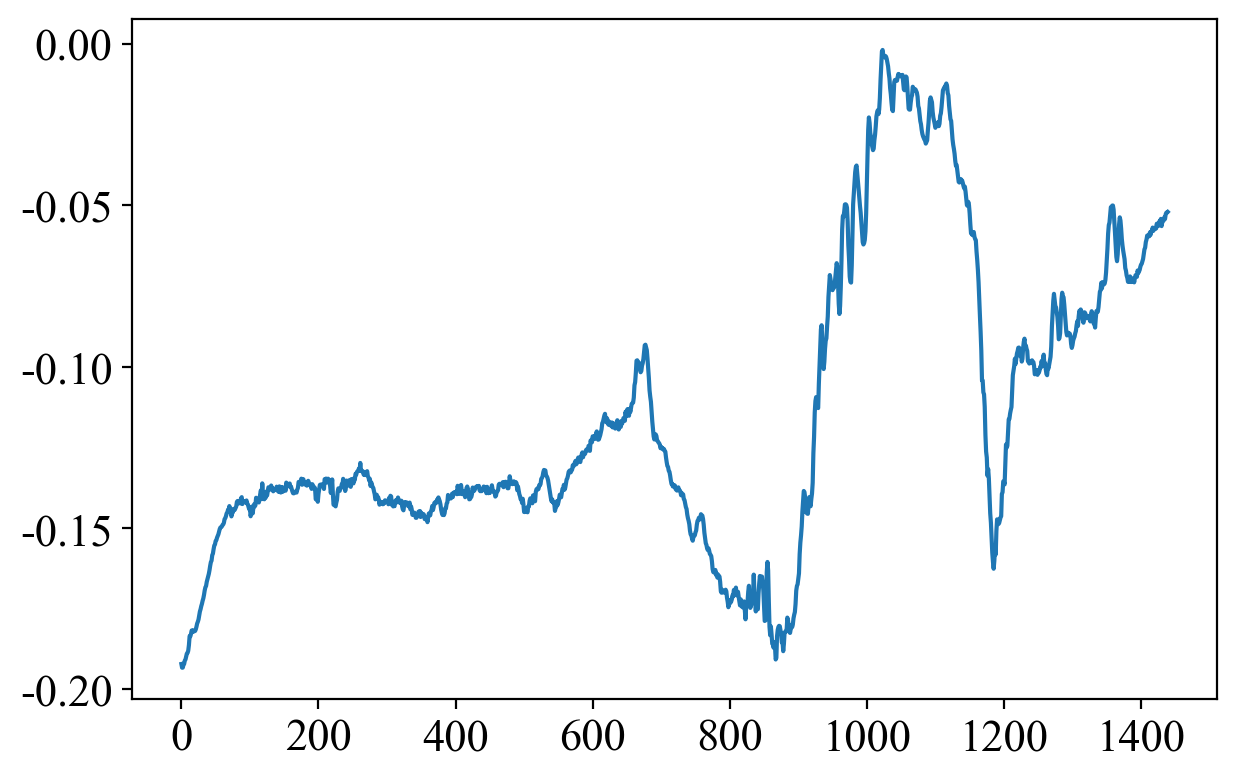

In [81]:
import datetime

import pylab as plt
from pkulast.validation.net import SURFRAD

s = SURFRAD()
print(s.available_sites)
time = datetime.datetime.strptime("2019-08-11 14:00:00", "%Y-%m-%d %H:%M:%S")
mins, downward_r, upward_r = s.get_data("bon", time)
acq_time = mins
y = downward_r - upward_r
x = downward_r
print(s.get_info("bon"))
print(s.get_lst("bon", time))

plt.plot(acq_time, y / x)
plt.show()